# Toko Online Ice


# Daftar Isi <a id='back'></a>

* [Pendahuluan](#intro)

* [Tahap 1. Ikhtisar Data](#data_review)
    * [Kesimpulan](#data_review_conclusions)
    
* [Tahap 2. Pra-pemrosesan data](#data_preprocessing)
    * [2.1 Kolom 'platform'](#col_platform)
    * [2.2 Kolom 'name' ](#col_name)
    * [2.3 Kolom 'genre' ](#col_genre)
    * [2.4 Kolom 'critic_score' ](#col_critic_score)
    * [2.5 Kolom 'user_score'](#col_user_score)
    * [2.6 Kolom 'rating'](#col_rating)
    * [2.7 Menghitung total sales](#tot_sales)
    * [2.8 Kesimpulan](#data_preprocessing_conclusions)
    
* [Tahap 3. Analisis](#analysis)
    * [3.1 Analisis Data Seputar Game](#als_game)
    * [3.1.1 Penerbitan Game sepanjang tahun](#als_penerbitan_game)
    * [3.1.2 Umur Platform](#als_umur_platform)
    * [3.1.3 Penjualan video game sejak 2007](#als_penjualan_sejak_2007)
    * [3.1.4 Membandingkan penjualan pada platform yang berpotensi menguntungkan](#als_banding_penjualan_platform)
    * [3.1.5 Pengaruh review pengguna dan profesional terhadap penjualan](#als_pengaruh_review_terhadap_penjualan)
    * [3.1.6 Genre yang paling menguntungkan](#als_genre_yang_paling_menguntungkan)
    * [3.2 Profil pengguna untuk setiap wilayah](#als_user)
    * [3.2.1 Profil Pengguna North America](#als_user_na)
    * [3.2.2 Profil Pengguna EU](#als_user_eu)
    * [3.2.3 Profil Pengguna Jepang](#als_user_jp)
    * [3.3 Kesimpulan](#analysis_conclusion)

* [Tahap 4. Pengujian Hipotesis](#hypothesis_test)
    * [4.1 Uji Hipotesis 1: 'Rata-rata rating pengguna platform Xbox One dan PC adalah sama"](#test_1)
    * [4.2 Uji Hipotesis 2: 'Rata-rata rating pengguna untuk genre Action dan Sports tidak sama](#test_2)

* [Temuan](#end)

## Pendahuluan <a id='intro'></a>

Peneliti bekerja untuk toko online Ice, yang menjual video game di seluruh dunia. Peneliti memiliki akses ke ulasan pengguna dan pakar, genre, platform (misalnya Xbox atau PlayStation), dan data historis tentang penjualan game. Peneliti perlu mengidentifikasi pola yang menentukan berhasil atau tidaknya suatu game. Hal ini akan memungkinkan kami mengenali calon pemenang utama dan merencanakan kampanye periklanan.

### Tujuan: 
Menganalisis faktor-faktor yang mendukung keberhasilan video game. mengidentifikasi pola yang menentukan berhasil atau tidaknya suatu game.

Menguji hipotesis berikut:
* Rata-rata rating pengguna platform Xbox One dan PC adalah sama.
* Rata-rata rating pengguna untuk genre Action dan Sports tidak sama.


### Tahapan
Data tentang games dan perangkatnya yang dijual di toko online Ice disimpan dalam *file*:
- /datasets/games.csv

Tidak ada informasi terkait kualitas data tersebut, jadi perlu diperiksa terlebih dahulu sebelum melakukan analisis lebih lanjut.

Pertama akan dilakukan evaluasi kualitas data dan melihat apakah terdapat hal yang signifikan yang perlu dilakukan tindak lanjut sebelum dilakukan proses analisis, di antaranya:
* Mengkonversi data menjadi tipe data yang dibutuhkan
* Menemukan dan mengeliminasi kesalahan pada data

Proyek ini akan terdiri dari empat tahap:
 1. Ikhtisar Data
 2. Pra-pemrosesan Data
 3. Proses Analisis
 4. Uji Hipotesis

 
[Kembali ke Daftar Isi](#back)

## Tahap 1. Ikhtisar Data <a id='data_review'></a>

Melakukan import library yang diperlukan, membuka data terkait yang akan dievaluasi, kemudian menjelajahi data tersebut.

**Step 1.1**
Melakukan import libraries yang diperlukan

In [1]:
from scipy import stats as st #untuk perhitungan probability dan statistics
import pandas as pd #untuk manipulasi dataframe
import matplotlib.pyplot as plt #untuk plotting dan display grafik
import numpy as np #untuk operasi matematika tingkat lanjut
import nltk #untuk manipulasi string/text

**Step 1.2**
Melakukan load data yang diperlukan dari file *games.csv*

In [2]:
try:
    games = pd.read_csv('games.csv')
except:
    games = pd.read_csv('/datasets/games.csv')
#membaca the csv file and konversi ke dataframe games

games.head() #melihat 5 baris awal dari dataframe games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Step 1.3**
Memeriksa informasi umum dari dataframe yang di-*load* file *games.csv*

In [3]:
games.info() #informasi umum terkait tabel pada games

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Membuat seluruh nama kolom seragam dengan mengkonversinya ke lowercase, kemudian ditindaklanjuti dengan missing values pada 'Name', 'Year_of_Release', 'Genre', 'Critic_Score', 'User_Score', dan 'Rating'

### Kesimpulan <a id='data_review_conclusions'></a> 

Diperlukan perbaikan data.

[Kembali ke Daftar Isi](#back)

## Tahap 2. Pra-pemrosesan Data <a id='data_preprocessing'></a>

**Step 2.1**
Membuat nama kolom menjadi lowercase.

Dengan menggunakan 'str.lower()'

In [4]:
games.columns = games.columns.str.lower()
#mengubah nama kolom menjadi lowercase dan menyimpan perubahannya
games.info() 
#melihat informasi umum terkait games

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Seluruh nama kolom sekarang dalam lowercase 

### Kolom 'platform' <a id='col_platform'></a>

**Step 2.2**
Mengubah value kolom 'platform' menjadi lowercase.

In [5]:
games['platform'] = games['platform'].str.lower()
#mengubah value kolom 'platform' menjadi lowercase dan menyimpan perubahannya
games.head()
#melihat informasi umum terkait games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,nes,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,gb,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Kolom 'name' <a id='col_name'></a>

Kolom ini hanya memiliki dua nilai yang hilang (baik yang tidak dimasukkan maupun hilang dalam proses penyalinan) dan tidak ada cara untuk mengisi nama sebenarnya dari game tersebut. Jadi akan dibiarkan kosong. Namun demikian kita dapat mengonversi nilainya menjadi huruf kecil.

**Step 2.3**
Mengubah value kolom 'name' menjadi lowercase.

In [6]:
games['name'] = games['name'].str.lower()
#mengubah value kolom 'name' menjadi lowercase dan menyimpan perubahannya
games.head()
#melihat informasi umum terkait games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Step 2.4**
Menganalisis unique values pada kolom 'name'.

In [7]:
games['name'].unique() #melihat unique values pada kolom 'name'

array(['wii sports', 'super mario bros.', 'mario kart wii', ...,
       'woody woodpecker in crazy castle 5', 'lma manager 2007',
       'haitaka no psychedelica'], dtype=object)

Kita bisa melihat bahwa dalam value 'mario kart wii' namanya mengandung platform. Kita perlu berasumsi bahwa terdapat value lain yang juga mencantumkan platform di namanya. Untuk menganalisis bagaimana kinerja game di seluruh platform, kita memerlukan game yang memiliki nama yang sama di seluruh platform. 
Kita perlu menulis sebuah fungsi yang memeriksa apakah nama game tersebut memiliki platform di dalamnya. Jika ada maka nama platform akan dihapus dari namanya.Karena kita memiliki nilai yang hilang, kita akan menggunakan try-except. Pada try, kita akan menyimpan kode yang akan coba dijalankan jika tidak terdapat kendala. Jika terdapat kendala sehingga tidak dapat dijalankan (seperti jika terdapat nilai yang hilang), kode yang akan kita simpan di except akan dijalankan.

**Step 2.5**
Membuat fungsi no_p_name dan mengaplikasikan fungsi tersebut.

In [8]:
def no_p_name(row): #membuat fungsi no_p_name yang menjadikan row sebagai argument
    try: #bila tidak ada kendala, baris berikut dijalankan
        name=row['name'] #menyimpan value dari baris di kolom 'name' dalam sebuah variabel bernama name
        
        #operator kondisi
        if row['platform'] in row['name']:
        #jika value kolom 'platform' terdapat pada value kolom 'name pada baris yang sama
            
            name = row['name'].strip(row['platform'])
            #variabel name menghilangkan platform dari value 'name'
            
            return name
            #mengembalikan value dari variabel name
        return name
        #mengembalikan value dari variabel name jika kondisi di atas tidak terpenuhi
    
    except: #bila terdapat kendala sehingga try tidak bisa dijalankan
        name=row['name']#menyimpan value dari baris di kolom 'name' dalam sebuah variabel bernama name
        return name #mengembalikan value dari variabel name
    
games['name'] = games.apply(no_p_name, axis=1)
#mengaplikasikan fungsi no_p_name ke dataframe games dan melakukan penyimpanan pada kolom 'name' 

games.head() #melihat 5 baris awal dari dataframe games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,sports,wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart,wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,sports resort,wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Kolom 'year_of_release' <a id='col_year_of_release'></a>

Kita dapat mencoba mengganti nilai yang hilang dengan median. Namun, kita tidak akan menggunakan median global. Nilai setiap tahun akan diisi dengan nilai median tahun untuk masing-masing platformnya. Ini dilakukan agar nilainya mewakili kumpulan data terkait. Untuk mwujudkannya, kita dapat mengelompokkan data berdasarkan 'platform' dan menghitung median tahun rilis pada setiap platform. Kemudian kita dapat menerapkan fungsi yang memeriksa data kita untuk mencari nilai year_of_release yang hilang. 
Ketika ditemukan, platform akan diperiksa dan selanjutnya mengembalikan nilai median year_of_release untuk platform tersebut dari data yang dikelompokkan

**Step 2.6**
Membuat fungsi year_fill dan mengaplikasikan fungsi tersebut.

In [9]:
year_mapper = games.groupby('platform')['year_of_release'].median().to_dict()
#mengelompokkan games berdasarkan platform dan mengambil median year_of_release game di platform dan mengubahnya menjadi dictionary 'year_mapper'

def year_fill(row):#membuat fungsi menggunakan row sebagai argument
    if np.isnan(row['year_of_release']):#kondisi bila value year_of_release missing
        return year_mapper.get(row['platform'])
        #mengembalikan nilai median year_of_release dari platform terkait dari dictionary year_mapper
    return row['year_of_release']
    #mengembalikan value year_of_release jika value tersedia

games['year_of_release'] = games.apply(year_fill, axis=1)
#mengaplikasikan fungsi ke games dan menyimpan hasilnya ke kolom year_of_release
games.info()#ginformasi umum terkait dataframe games

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Step 2.7**
Mengubah tipe data kolom 'year_of_release' ke integer.

In [10]:
games['year_of_release'] = games['year_of_release'].astype('int')
#konversi value 'year_of_release' ke integer

games.info() #informasi umum terkait dataframe games

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.3+ MB


### Kolom 'genre' <a id='col_genre'></a>

Kolom ini hanya memiliki dua kondisi missing value (yang tidak dimasukkan atau hilang dalam proses) dan tidak ada cara untuk mengisi genre yang tepat. Jadi kondisi ini akan tetap dibiarkan kosong. Namun demikian kita dapat mengubah nilainya menjadi huruf kecil

**Step 2.8**
Mengubah value kolom 'name' menjadi lowercase.

In [11]:
games['genre'] = games['genre'].str.lower()
#mengubah value kolom 'genre' menjadi lowercase
games.head()
#informasi umum terkait dataframe games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Step 2.9**
Mengganti missing values pada kolom 'genre' dengan kata 'undefined'.

In [12]:
games['genre'] = games['genre'].fillna('undefined')
#mengganti missing values pada kolom 'genre' dengan kata 'undefined'
games.head()
#informasi umum terkait dataframe games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Kolom 'critic_score' <a id='col_critic_score'></a>

**Step 2.10**
Mengambil keputusan terhadap missing values.

In [13]:
games.info() #informasi umum terkait dataframe games

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.3+ MB


Meski kolom ini merupakan kolom kuantitatif dan kita dapat menggantinya nilai yang hilang dengan nilai median, namun jumlah item missing value terlalu besar (8.578 atau 51,32%). Oleh karenanya missing value akan tetap dibiarkan apa adanya.

### Kolom 'user_score' <a id='col_user_score'></a>

Dalam kondisi awal, kolom ini bertipe objek walau kita melihat terdapat angka di sana yang artinya kolom tersebut bisa juga terdapat string teks. Jadi, sebelum melakukan konversi, nilainya perlu diperiksa terlebih dahulu. Kita dapat meneerapkan 'value_counts()'.

In [14]:
games['user_score'].value_counts() #mengaplikasikan 'value_counts()' pada dataframe games

user_score
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

"tbd" menempati puncak teratas dalam data yang menjadikannya sebagai sebuah masalah, karena ini digunakan untuk video game yang belum memiliki user_score dan muncul 2424 kali jadi kita perlu mencari tahu apa yang harus dilakukan sebelum mengubah seluruh kolom menjadi tipe float. 
Kita harus mempelajari pengaruh review dan sales. "tbd" bukan review; ini berarti game tersebut belum ditinjau. Jadi kita akan menganggap game-game ini tidak memiliki review, jadi kita akan mengganti "tbd" dengan nilai NaN

**Step 2.11**
Mengganti 'tbd' pada kolom 'user_score' menjadi NaN atau missing value.

In [15]:
games['user_score'] = games['user_score'].replace({'tbd' : np.nan})
#mengganti value 'tbd' pada kolom 'user_score' menjadi NaN atau missing value
games['user_score'] = games['user_score'].astype('float')
#konversi data pada kolom 'user_score' menjadi tipe float

**Step 2.12**
Mengambil keputusan terhadap missing values.

In [16]:
games.info() #informasi umum terkait dataframe games

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


Meski kolom ini merupakan kolom kuantitatif dan kita dapat menggantinya nilai yang hilang dengan nilai mean, namun jumlah item missing value terlalu besar (9.125 atau 54,59%). Oleh karenanya missing value akan tetap dibiarkan apa adanya.

Kita akan mengganti value NaN dengan value mean. Kita dapat menggunakan mean karena kita memiliki nilai float dalam rentang yang ditentukan.

### Kolom 'rating' <a id='col_rating'></a>

Pemeriksaan value kolom 'rating' 

In [17]:
games['rating'].unique()
#melihat unique values pada kolom 'rating'

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Mengingat kolom ini merupakan kolom yang penting dan bersifat kategorikal, kita akan melakukan penggantian nilai yang hilang namun tidak dengan value mean atau value median melainkan dengan value modus. 
Jadi kita akan mengelompokkan data berdasarkan genre, dan untuk setiap genre, mendapatkan peringkat terpopuler dan mengonversi kerangka data yang dihasilkan ke dalam dictionary. Kemudian, kita dapat menulis fungsi yang memeriksa baris dengan missing values di kolom 'rating'dan memeriksa genre-nya, kemudian mengembalikan rating paling populer untuk genre tersebut. Kemudian kita dapat mengaplikasikan fungsi tersebut pada games dan menyimpan hasilnya ke kolom 'rating'.

**Step 2.13**
Membuat fungsi rating_fill dan mengaplikasikan fungsi tersebut.

In [18]:
rating_mapper = games.groupby('genre')['rating'].agg(pd.Series.mode).to_dict()
#mengelompokkan dataframe games berdasarkan genre dan menghitung peringkat paling populer untuk setiap genre kemudian mengubah kerangka data yang dihasilkan menjadi dictionary rating_mapper

def rating_fill(row):#membuat fungsi yang menggunakan variabel row sebagai argument
    if pd.isna(row['rating']):#kondisi bila value kolom 'rating' tidak ada
        return rating_mapper.get(row['genre'])
        #mengembalikan peringkat paling populer berdasarkan 'genre' dari dictionary rating_mapper
    return row['rating']#mengembalikan nilai rating bila tersedia

games['rating'] = games.apply(rating_fill, axis=1)
#mengaplikasikan fungsi ke games dan menyimpan hasilnya pada kolom 'rating'
games.info()#informasi umum terkait dataframe games

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


### Menghitung total sales <a id='tot_sales'></a>

**Step 2.14**
Menambahkan kolom na_sales, eu_sales, dan jp_sales, kemudian menyimpan hasilnya ke kolom 'total_sales'.

In [19]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
 11  total_sales      16715 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.5+ MB


### Kesimpulan <a id='data_preprocessing_conclusions'></a> 

Kita telah membuat semua nama kolom menjadi huruf kecil, lalu kita mengisi nilai yang hilang di kolom pplatform, year_of_release, genre, dan rating. Khusus untuk missing values pada critic_score dan user_score, mengingat jumlahnya yang terlalu besar maka diambil keputusan untuk dibiarkan. 
Terakhir kita juga telah menambahkan kolom baru yakni total_sales yang merupakan penjumlahan dari nilai kolom na_sales, eu_sales, jp_sales, dan other_sales.

[Kembali ke Daftar Isi](#back)

## Tahap 3. Analisis <a name='analysis'></a>

## Analisis Data Seputar Game <a id='als_game'></a>

### Penerbitan Game sepanjang tahun  <a id='als_penerbitan_game'></a>

Informasi ini dapat kita peroleh dengan mengelompokkan games berdasarkan year_of_release dan menghitung game name setiap tahunnya.

In [20]:
year_count=games.groupby('year_of_release')['name'].count()
#membuat year_count untuk mengelompokkan games berdasarkan year_of_release dan mendapatkan jumlah game yang diterbitkan setiap tahunnya
year_count

year_of_release
1980       9
1981      46
1982      53
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     290
1998     386
1999     341
2000     350
2001     482
2002     829
2003     800
2004     783
2005     973
2006    1006
2007    1197
2008    1457
2009    1476
2010    1302
2011    1161
2012     653
2013     552
2014     582
2015     606
2016     502
Name: name, dtype: int64

**Step 3.1**
Penggambaran dalam bar chart

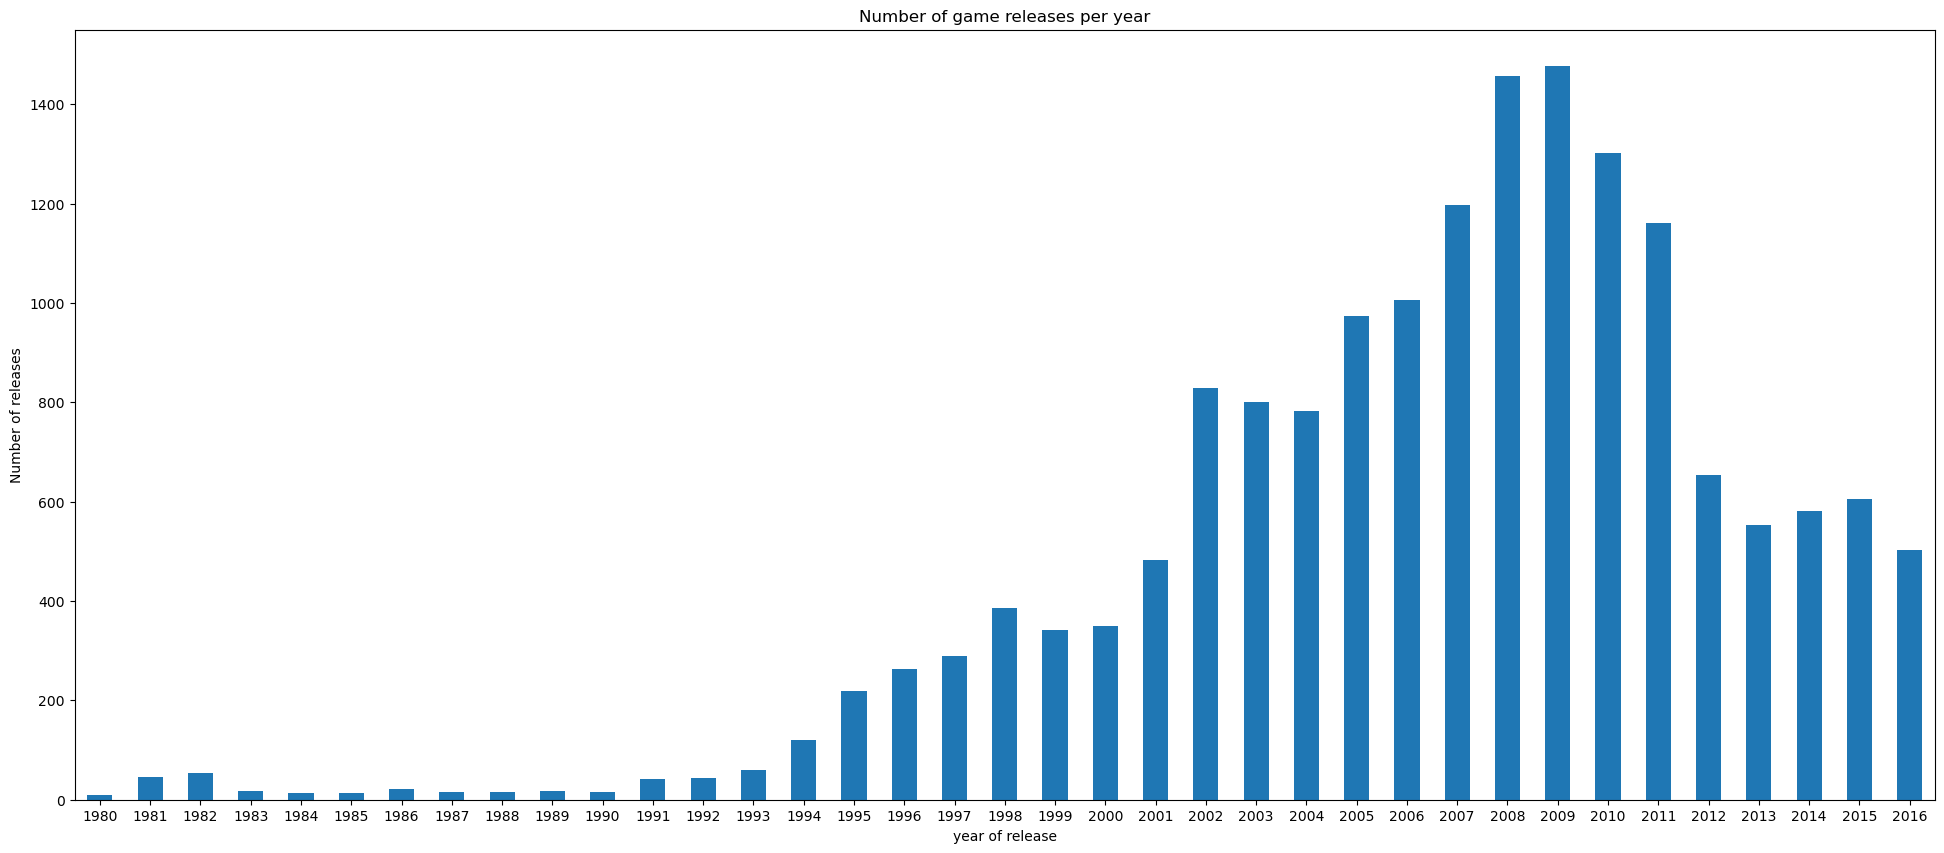

In [21]:
year_count.plot.bar(rot=0, figsize=(24, 10))
plt.title('Number of game releases per year')
plt.xlabel('year of release')
plt.ylabel('Number of releases')
plt.show()
#menampilkan bar chart untuk tabel year_count yang menunjukkan tahun dan berapa banyak game yang diterbitkan setiap tahunnya

Antara tahun 1980 dan 1995, kurang dari 200 video game dirilis setiap tahunnya. Video game mulai menjadi lebih populer sejak tahun 1995 dan seterusnya dengan tahun 2001 memiliki sekitar 500 rilis. Tahun 2002 terjadi peningkatan tajam, lebih dari 800 game dirilis tahun itu. Tahun 2007 hingga 2011 adalah tahun teratas dalam hal rilis, dan di tahun 2009 mencapai puncaknya dengan menghasilkan 1.476 rilis.

### Umur Platform  <a id='als_umur_platform'></a>

Total sales tiap platform dan urutan peringkatnya.

In [22]:
platform_rank = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
#mengelompokkan games berdasarkan platform dan menghitung jumlah total_sales masing-masing platform dalam urutan descending
top_platforms=platform_rank.head()
#menampilkan 5 baris awal dari platform_rank
top_platforms

platform
ps2     1255.77
x360     971.42
ps3      939.65
wii      907.51
ds       806.12
Name: total_sales, dtype: float64

PS2 memimpin penjualan dengan angka lebih dari 1 miliar, diikuti oleh X-box 360, PS3, Wii, dan Nintendo DS. 
Bar chart terkait total penjualan setiap tahun adalah sebagai berikut.

**Step 3.2**
Loop for untuk menganalisis 5 platform teratas.

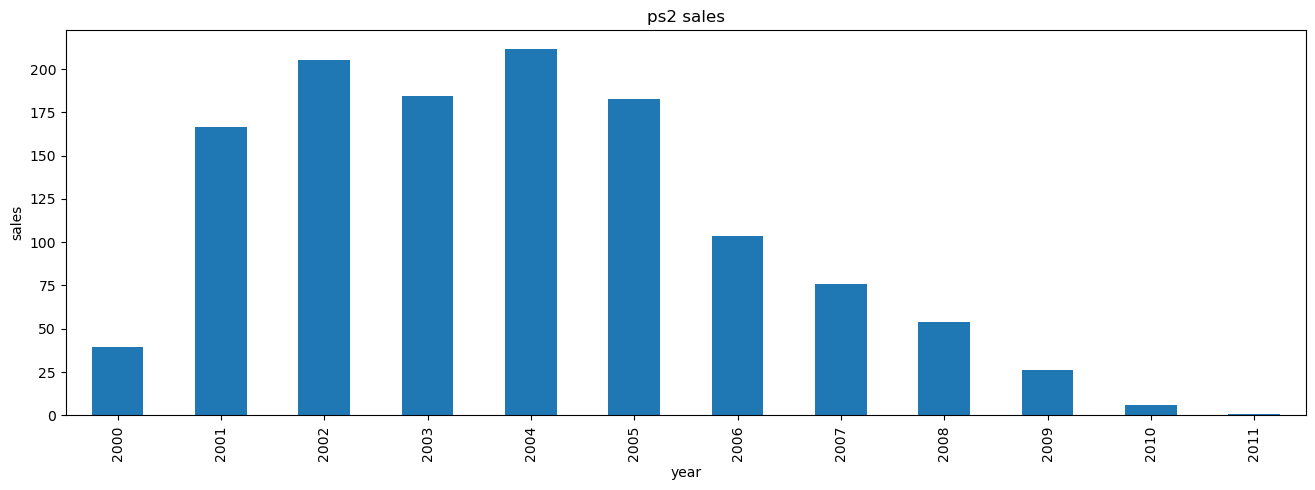

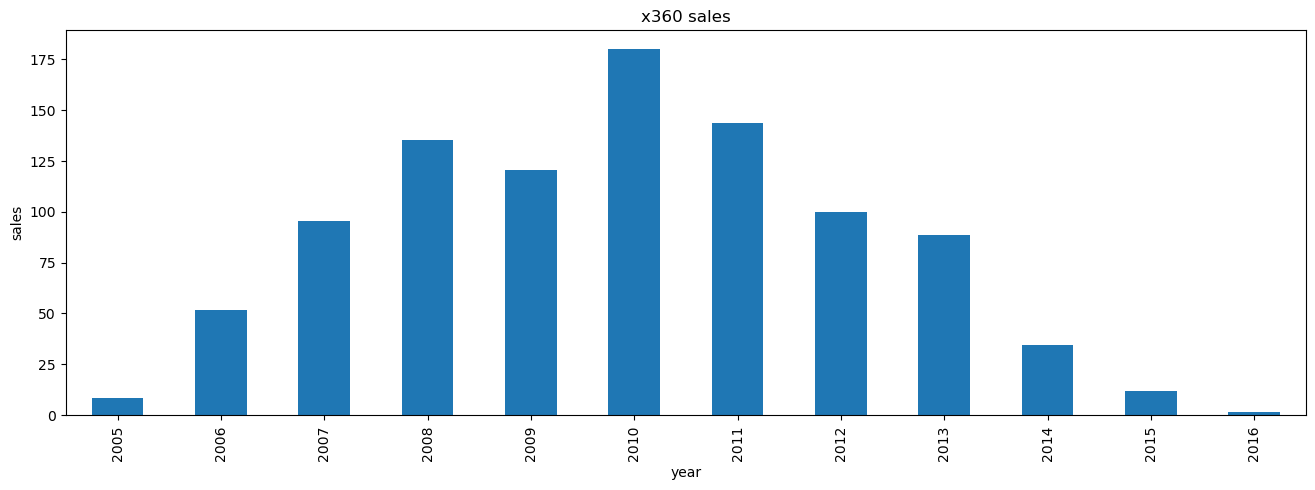

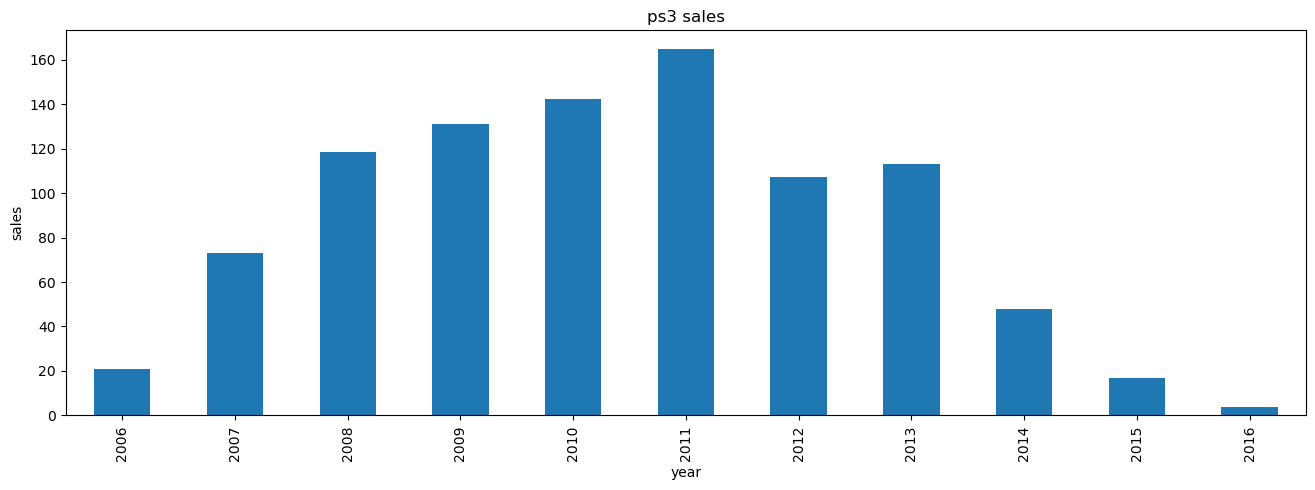

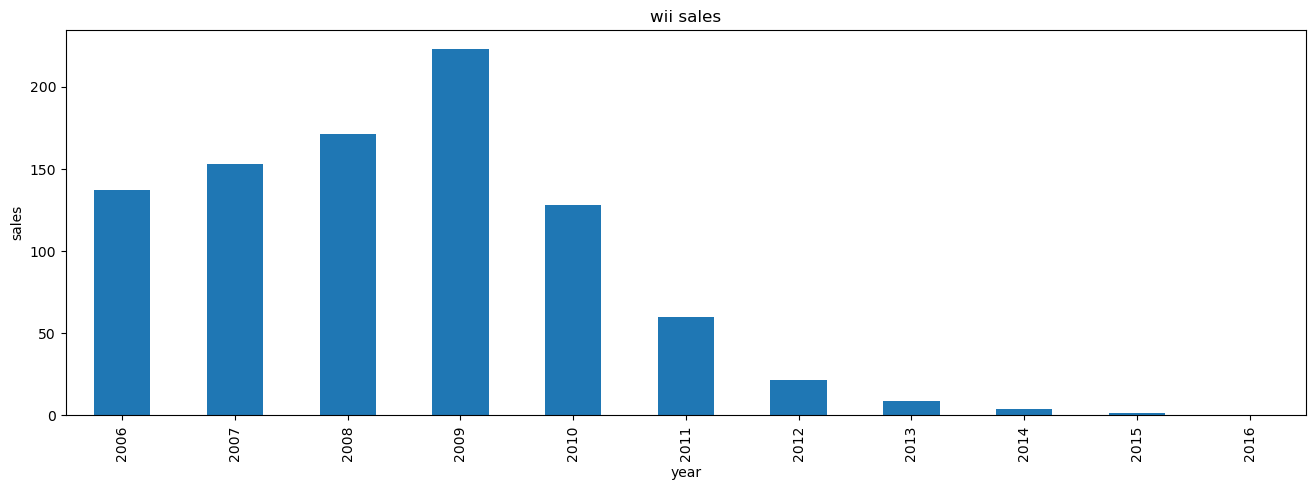

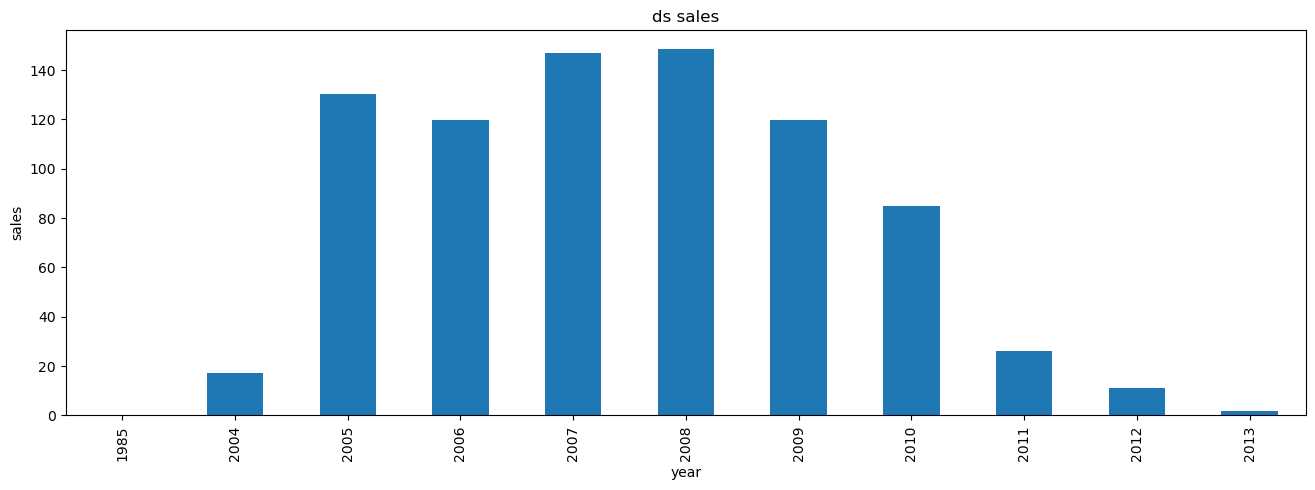

In [23]:
for platform in top_platforms.index: #loop melalui 5 platform teratas
    p_slice=games.query('platform == @platform')
    #membuat irisan row dari games yang nilai platformnya sama dengan 5 platform teratas
    p_slice.groupby('year_of_release')['total_sales'].sum().plot.bar(figsize=(16, 5))
    #mengelompokkan irisan berdasarkan year_of_release dan menghitung total_sales tiap tahunnya dan menampilkan dalam bar chart
    plt.title('{} sales'.format(platform))#mengolah grafik dengan format ''<platform> sales'
    plt.xlabel('year')#memberikan label sumbu-x sebagai 'year'
    plt.ylabel('sales')#memberikan label sumbu-y sebagai 'sales'
    plt.show()#menampilkan grafik
    print('')#mencetak garis kosong

PS2 dimulai pada tahun 2000, mengalami peningkatan penjualan dan menjadi sangat populer pada tahun 2004, setelah itu mengalami penurunan penjualan dan nol penjualan setelah tahun 2010. Penggantinya, PS3, muncul pada tahun 2006 saat PS2 mengalami penurunan penjualan. 
Wii muncul pada tahun 2006, kemudian mencapai puncaknya pada tahun 2009, namun setelah itu menurun dan mencatat nol penjualan setelah tahun 2015. Wiiu, penerus wii, muncul pada tahun 2012 selama penurunan wii. 
DS muncul pada tahun 2004, kemudian menjadi sangat populer pada tahun 2007 dan 2008, dan setelah itu mengalami penurunan dan mencatatkan nol penjualan setelah tahun 2013. 
Jadi, diperlukan waktu 6 hingga 7 tahun agar konsol game baru muncul, dan 9 hingga 10 tahun hingga sebuah platform benar-benar hilang dari pasar. 
Terlihat bahwa data yang relevan dimulai dari tahun 2007 sehingga dapat memiliki garis waktu yang serupa dengan umur platform.

### Penjualan video game sejak 2007 <a id='als_penjualan_sejak_2007'></a>

In [24]:
relev_data = games.query('year_of_release >= 2007')
#membuat irisan row dengan year_of_release tahun 2007 ke atas
relev_platform_rank = relev_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
#mengelompokkan relev_data berdasarkan platform, menghitung jumlah total_sales untuk setiap platform dan mengurutkannya dengan urutan descending
relev_platform_rank

platform
ps3     918.69
x360    911.55
wii     770.36
ds      538.88
ps4     314.14
3ds     259.00
psp     187.83
pc      164.33
ps2     162.38
xone    159.32
wiiu     82.19
psv      54.07
gba       3.40
xb        0.73
gc        0.27
dc        0.06
Name: total_sales, dtype: float64

PS3 memimpin total penjualan sejak 2007, diikuti oleh x360, wii, ds, ps4 untuk masuk 5 besar. Untuk mengetahui mana yang tumbuh atau menyusut, dapat dilihat dalam bar chart untuk setiap platform berikut.

**Step 3.3**
Loop for untuk menganalisis relev_platform_rank.

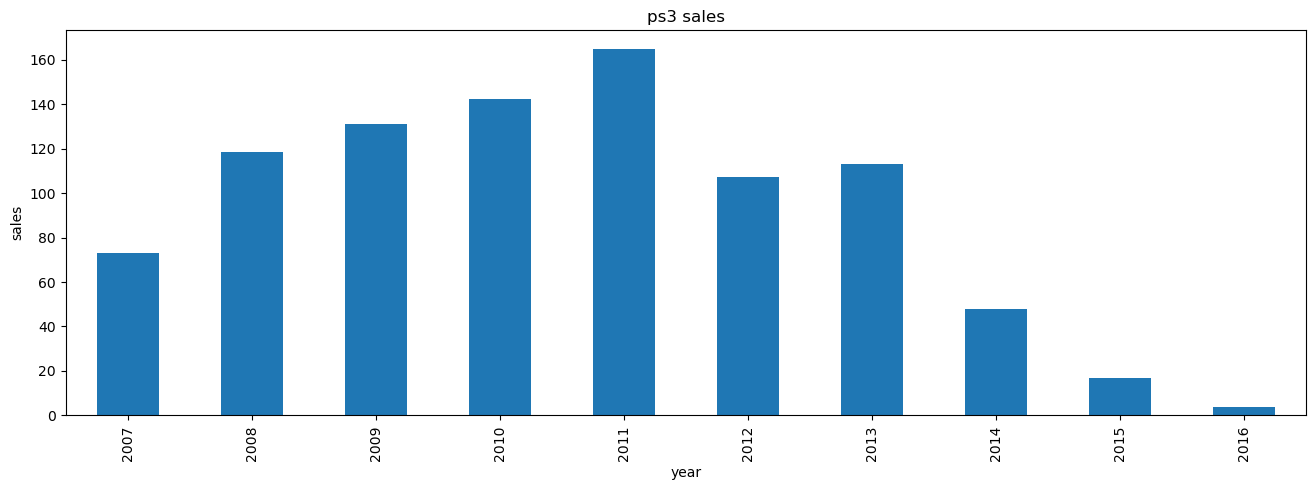

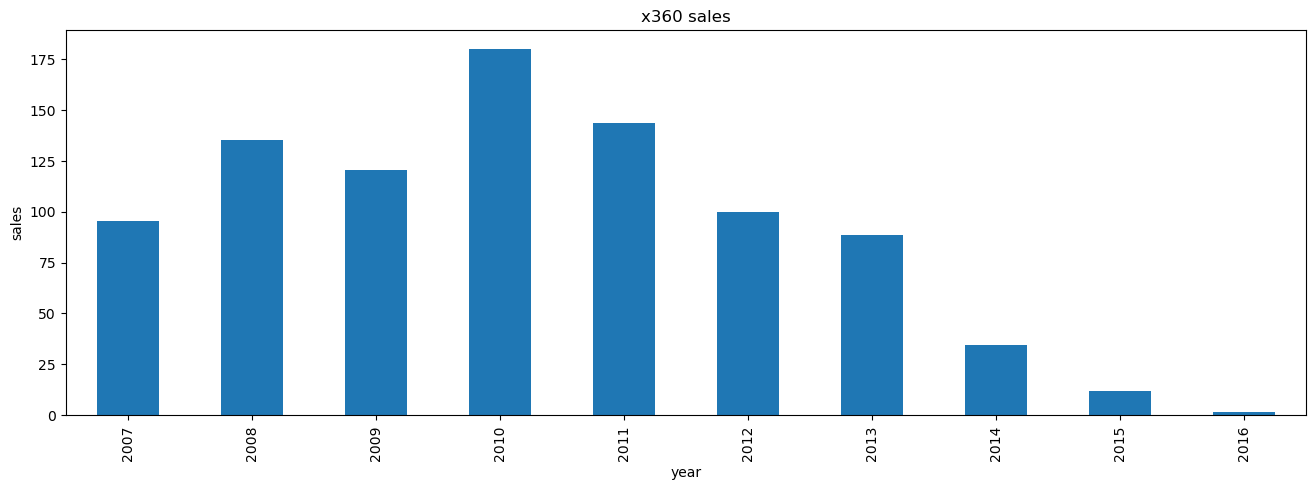

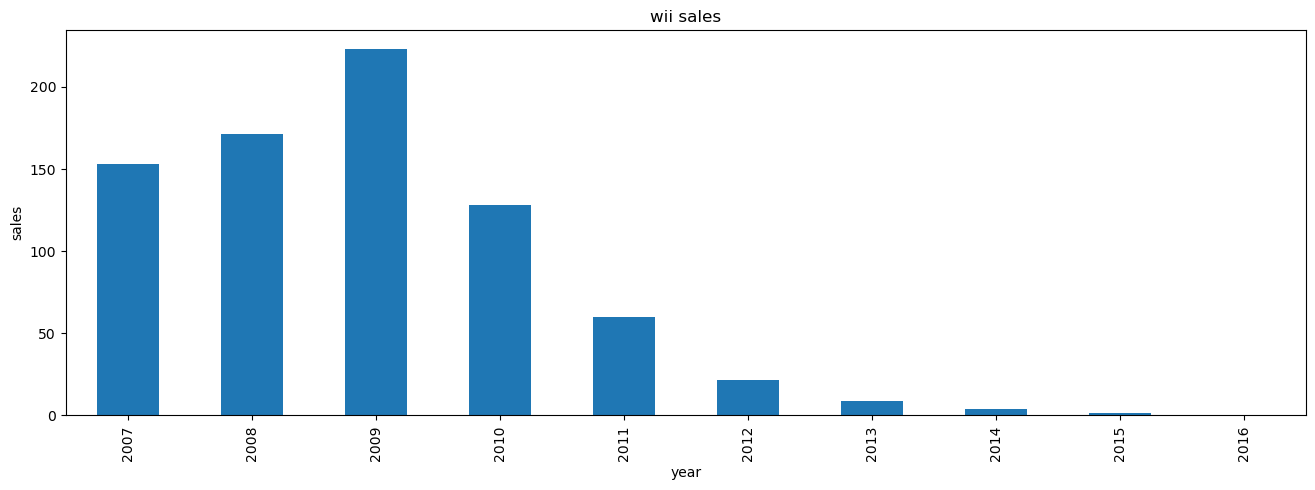

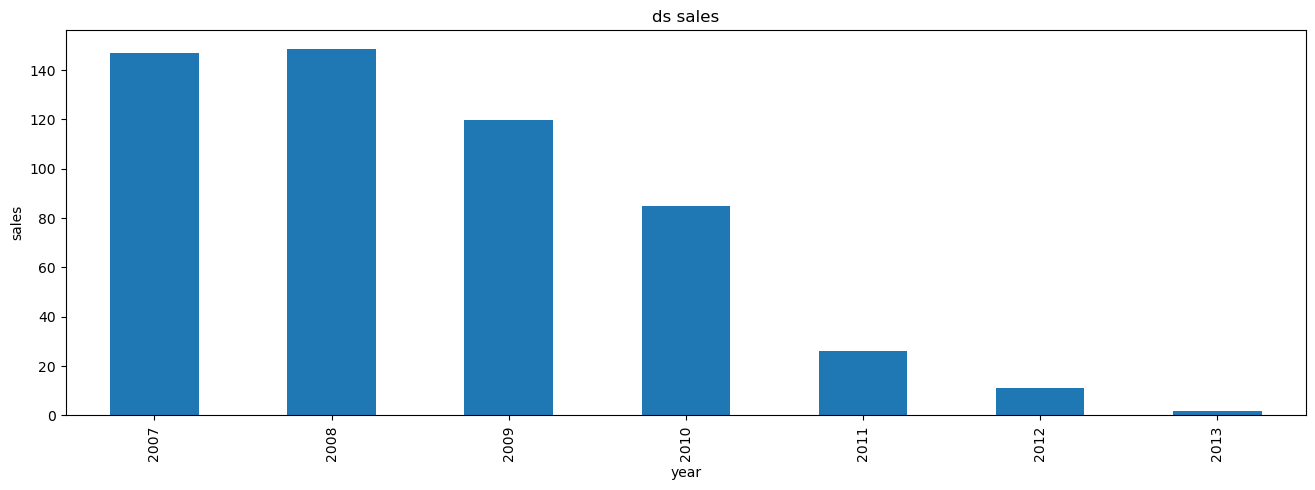

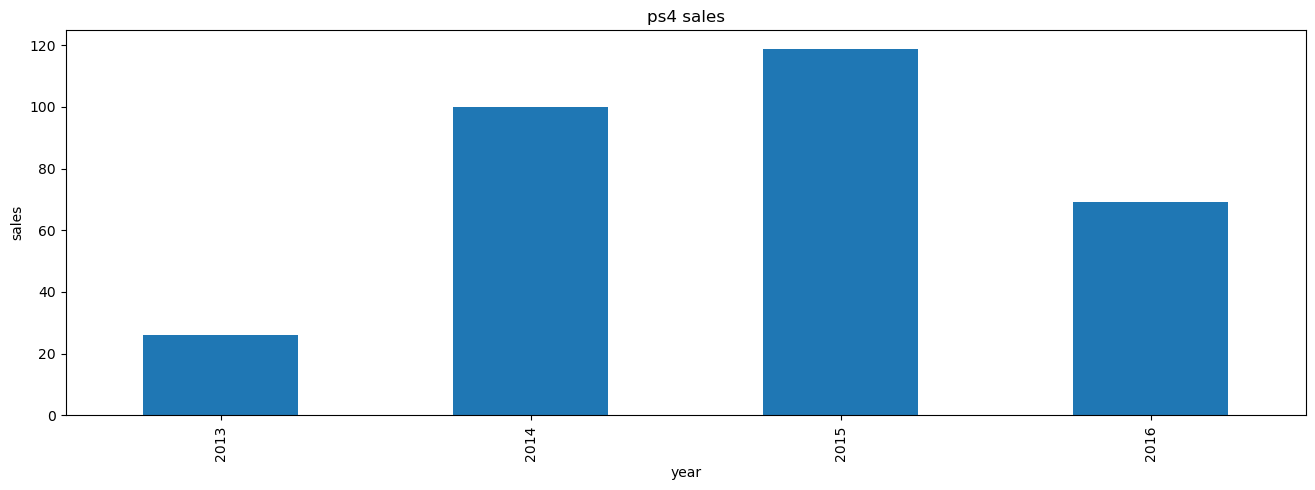

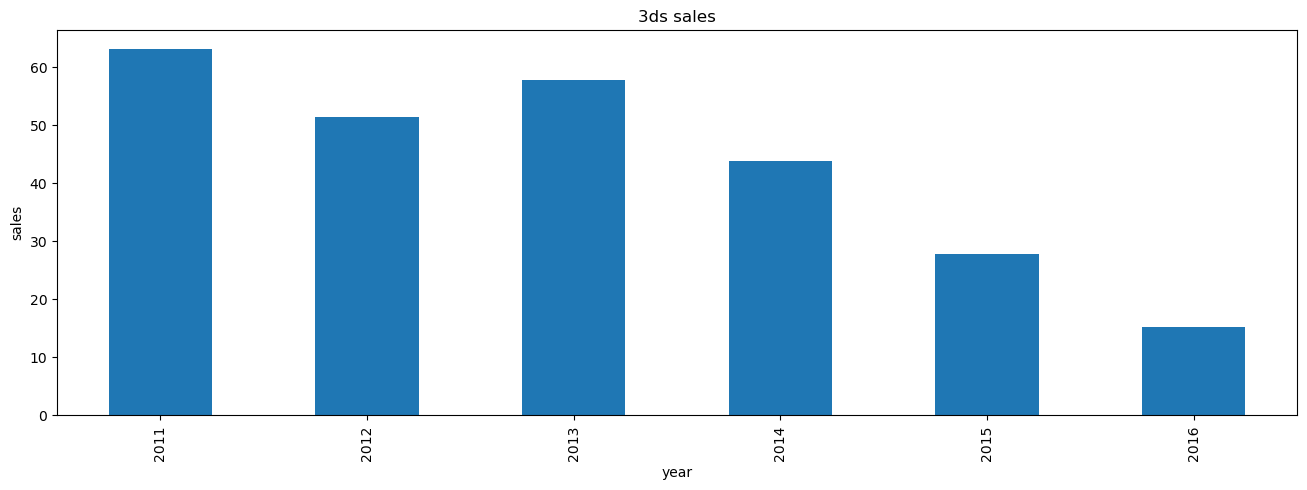

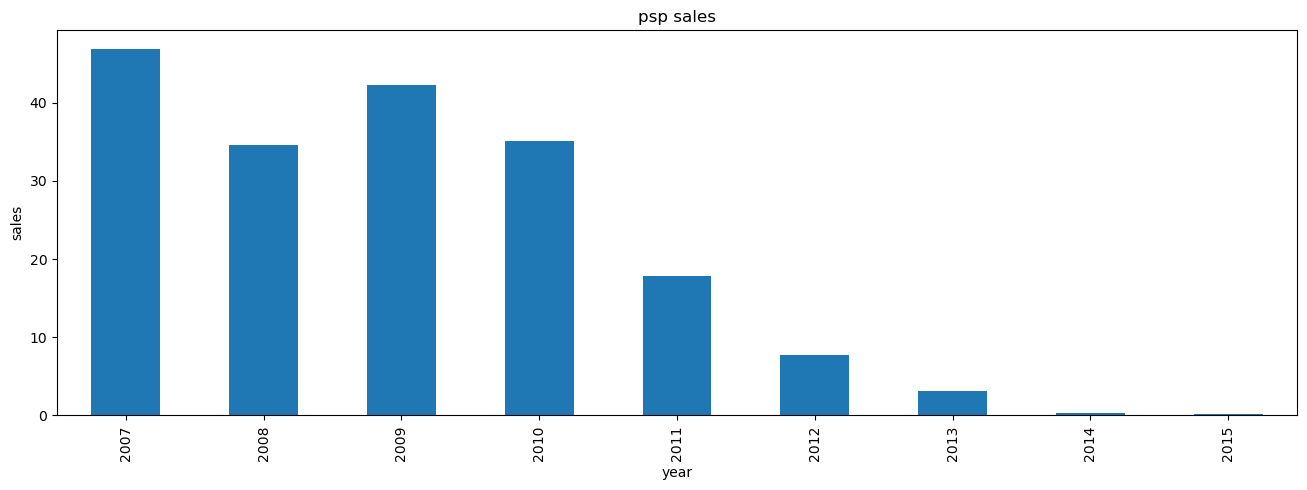

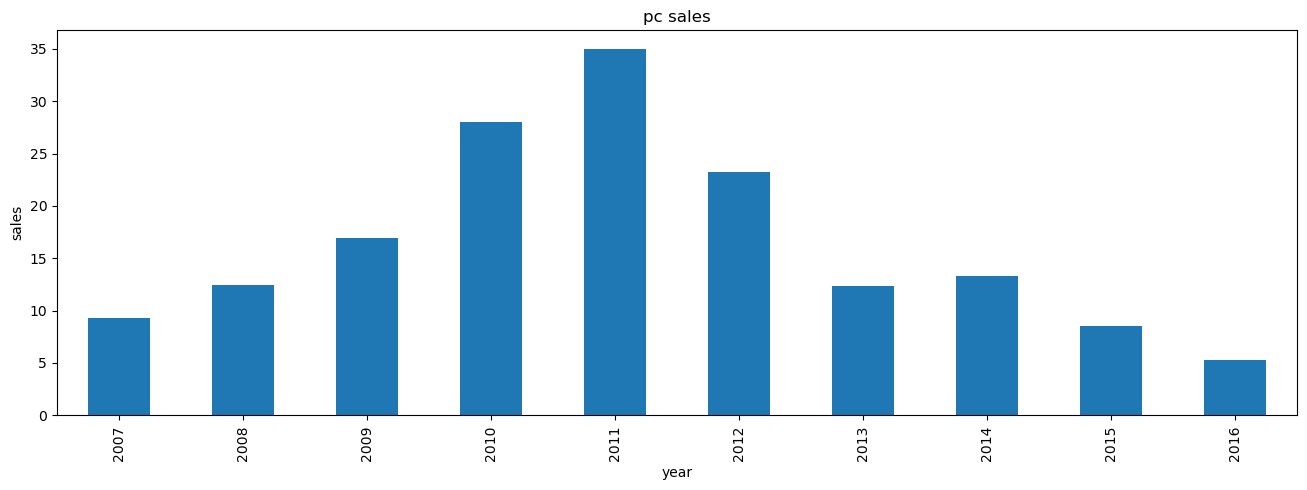

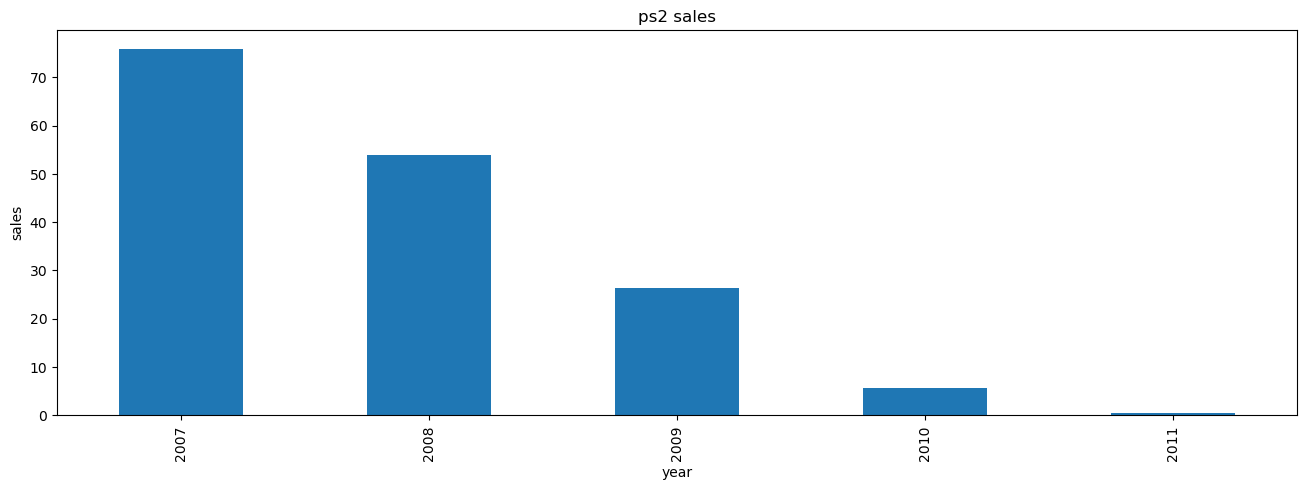

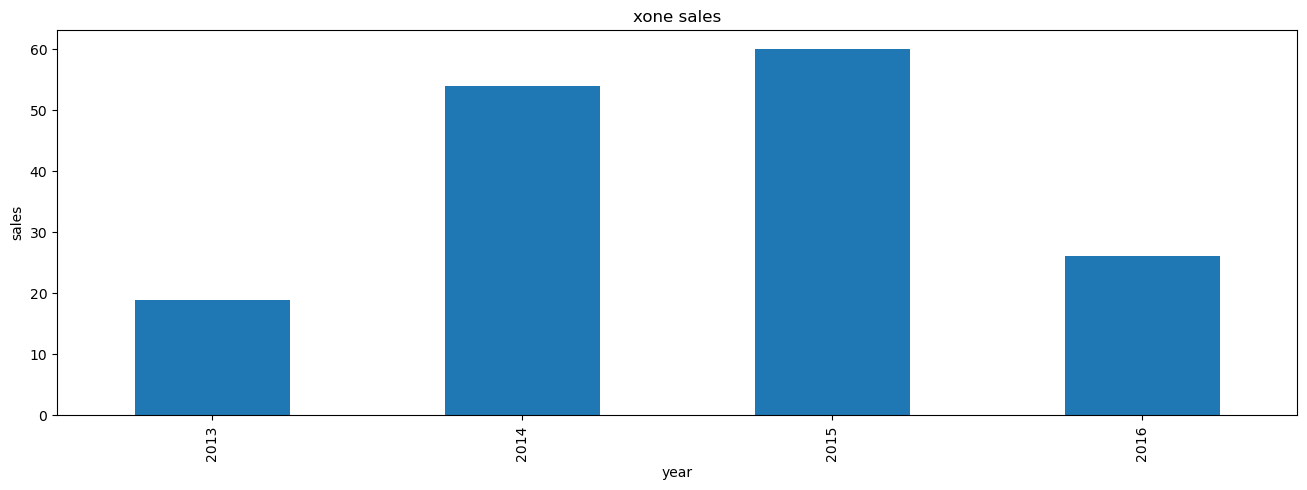

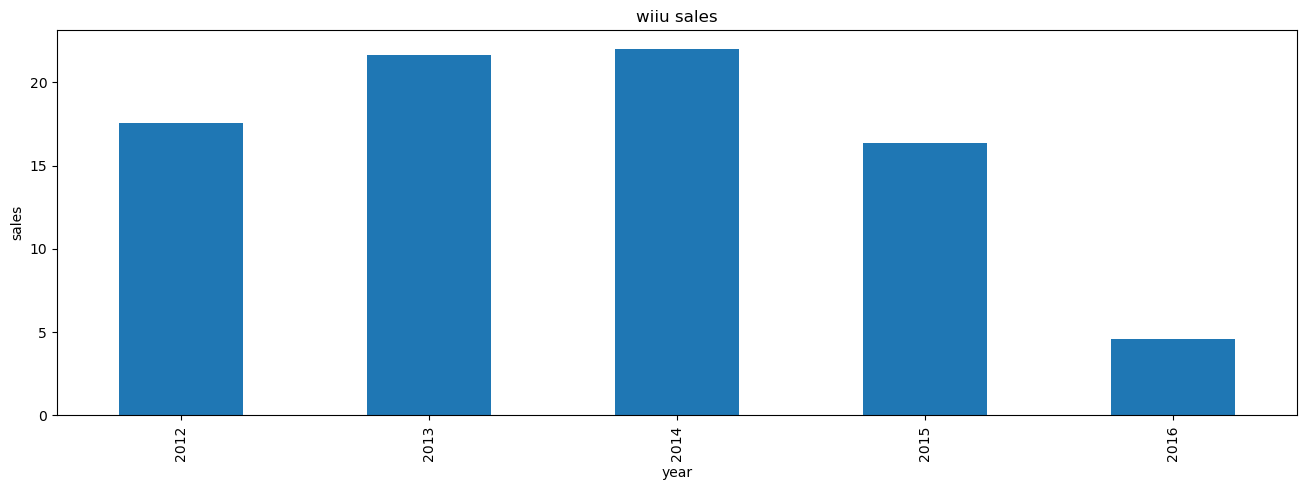

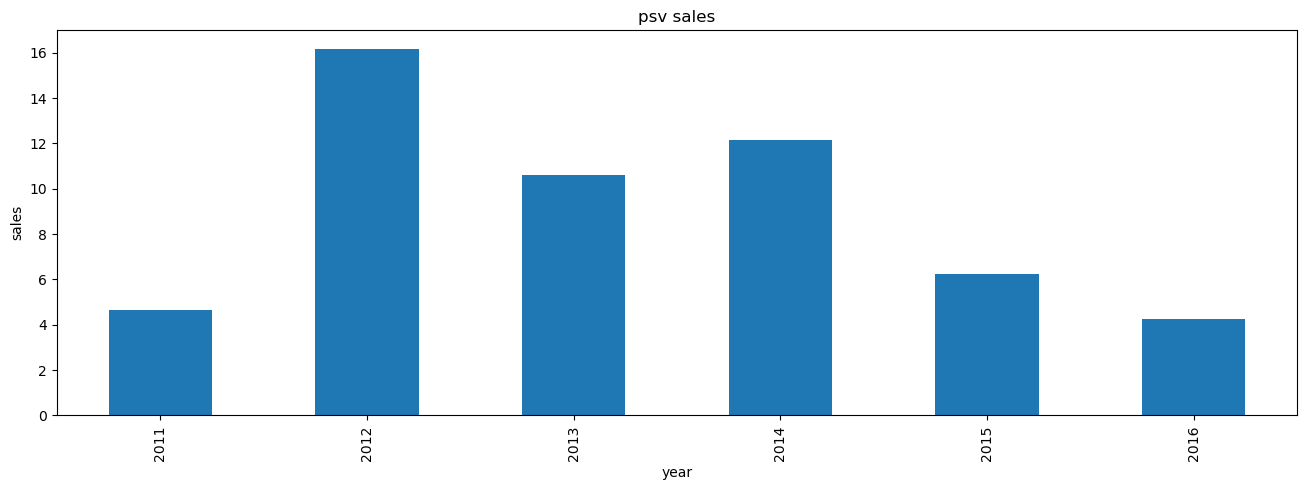

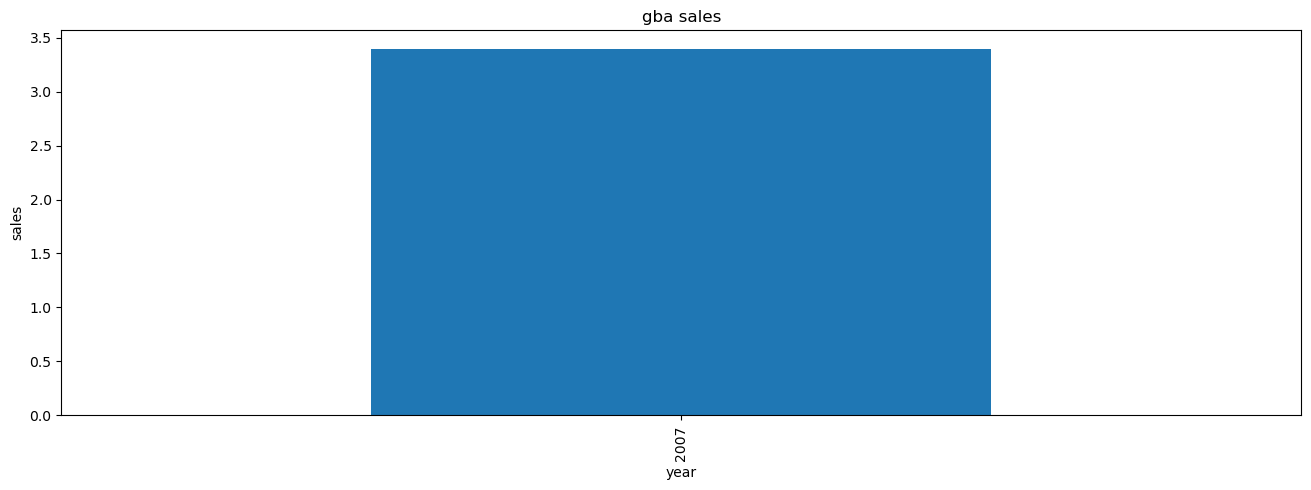

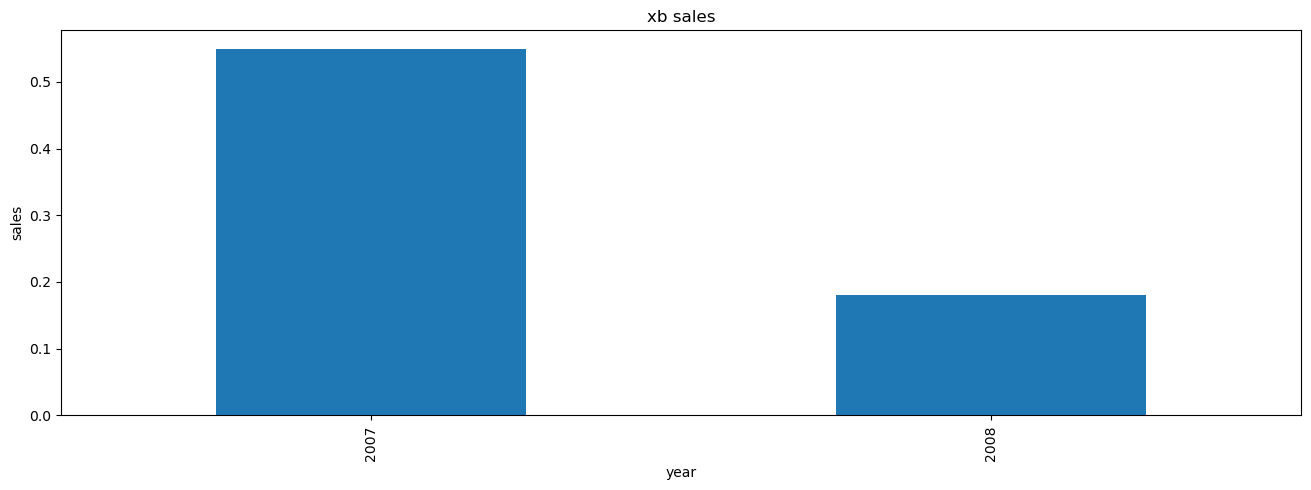

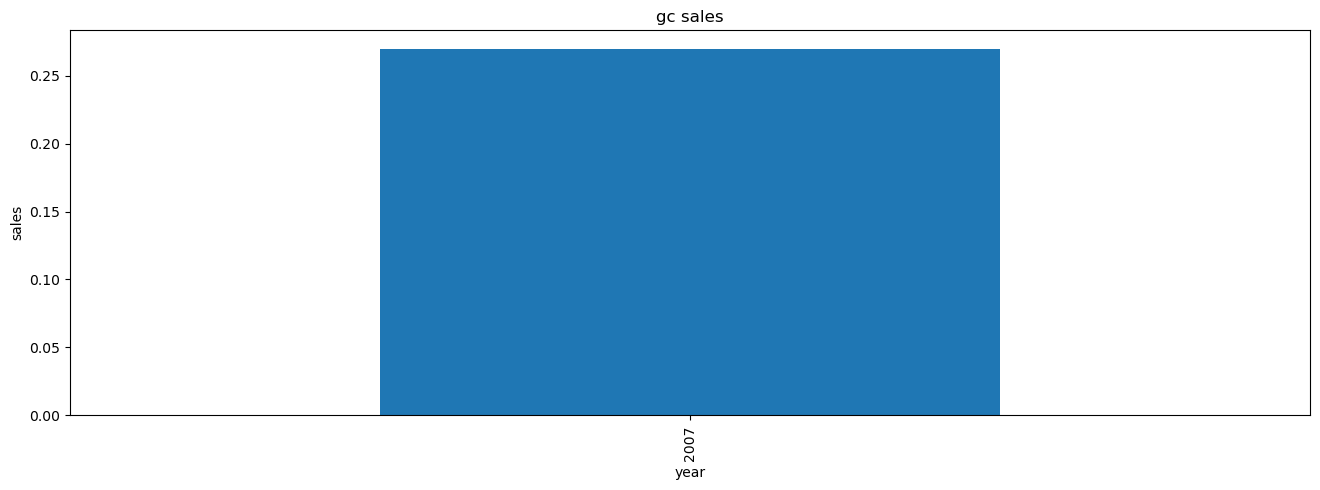

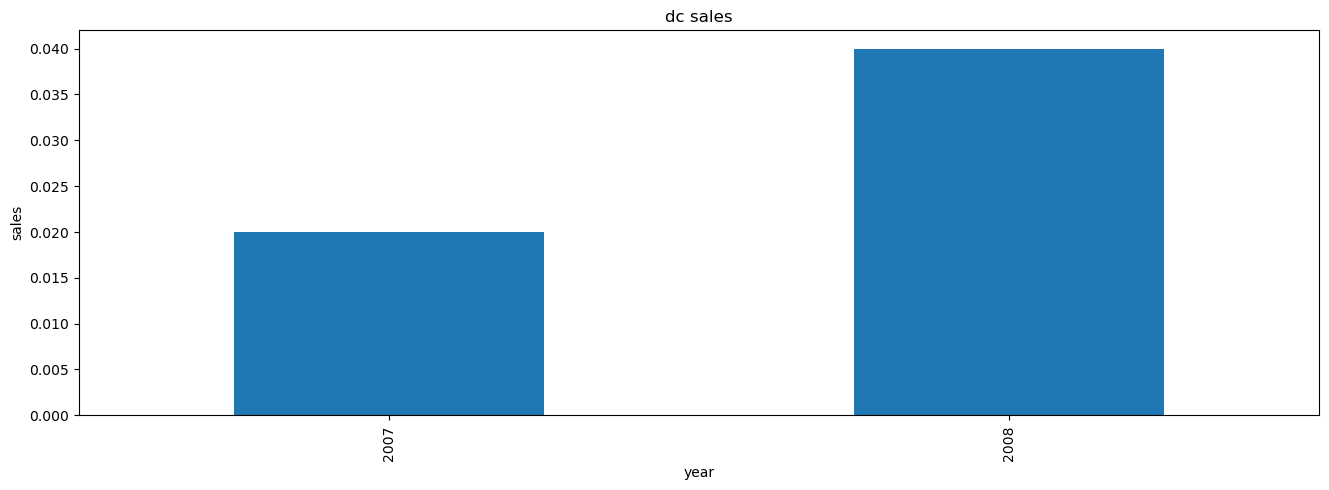

In [25]:
for platform in relev_platform_rank.index:#loop melalui platform di relev_platform_rank
    p_slice=relev_data.query('platform == @platform')
    #membuat irisan row dari relev_data yang nilai platformnya mengambil nilai platform saat ini
    p_slice.groupby('year_of_release')['total_sales'].sum().plot.bar(figsize=(16, 5))
    #mengeompokkan irisan berdasarkan year_of_release dan menghitung jumlah total_sales untuk setiap tahunnya dan menampilkannya dalam bar chart
    plt.title('{} sales'.format(platform))#mengolah grafik dengan format ''<platform> sales'
    plt.xlabel('year')#memberikan label sumbu-x sebagai 'year'
    plt.ylabel('sales')#memberikan label sumbu-y sebagai 'sales'
    plt.show()#menampilkan grafik
    print('')#mencetak garis kosong

Platform yang menyusut penjualannya adalah ps3, x360, wiiu, pc, 3ds, dan psv. Platform yang meningkat penjualannya adalah ps4 dan xone. Bins mereka tidak sebesar pada tahun 2016 mungkin karena tahun 2016 belum berakhir ketika data diperoleh. Namun keduanya masih dalam tahap awal siklus hidupnya sehingga kita dapat mengharapkan keduanya menghasilkan lebih banyak keuntungan setidaknya untuk 2 atau 3 tahun ke depan. Sedangka platform lainnya sudah mengalami kematian sebelum tahun 2016.

### Membandingkan penjualan pada platform yang berpotensi menguntungkan <a id='als_banding_penjualan_platform'></a>

Platform yang berpotensi menguntungkan adalah platform yang masih dapat menghasilkan penjualan di tahun 2017, dilihat dari seberapa baik kinerjanya di tahun 2016 yaitu xone, ps4, pc, 3ds, wiiu, dan psv. Jadi kita dapat membuat potongan dari tabel relev_data yang berisi baris dengan platform ps4 atau xone untuk kemudian membuat boxplot penjualan berdasarkan platform

**Step 3.4**
Menampilkan box plot dari irisan penjualan berdasarkan platform.

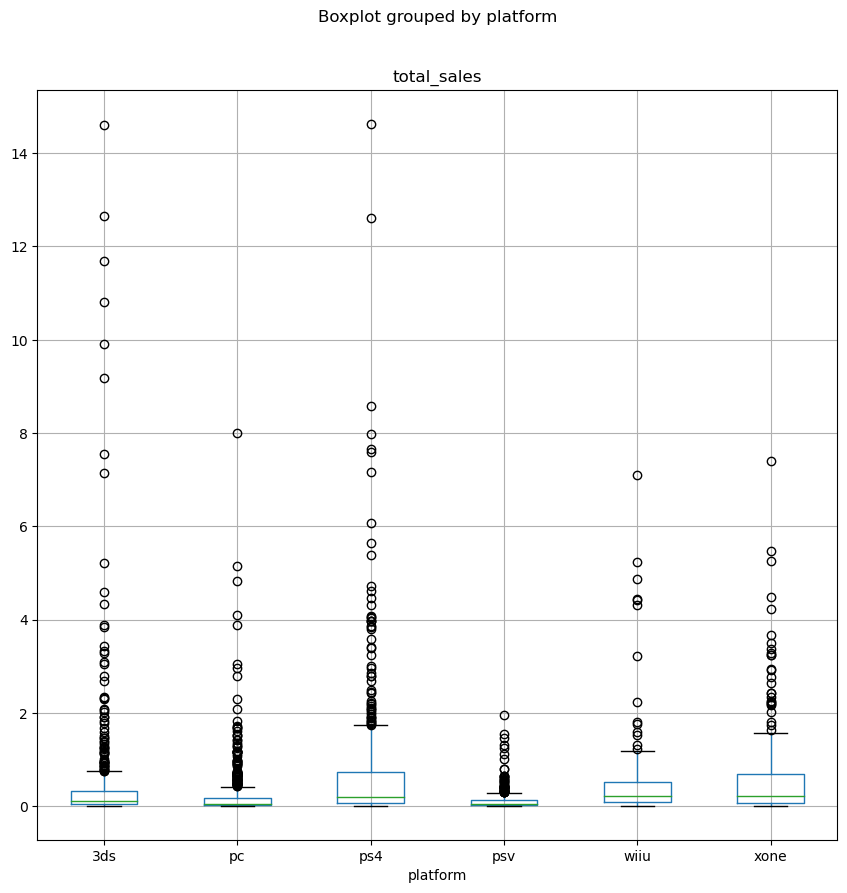

In [26]:
pprof_platforms=relev_data.query('platform == "ps4" | platform == "xone" | platform == "3ds" | platform == "wiiu" | platform == "pc" | platform == "psv"')
#membuat irisan dari relev_data dengan row di mana platformnya berpotensi menguntungkan sebagaiman telah disebutkan sebelumnya
pprof_platforms.boxplot(column='total_sales', by='platform', figsize=(10, 10))
#membuat boxplot dari irisan penjualan berdasarkan platform
plt.show()#menmpilkan grafik tersebut di atas

Tidak ada perbedaan drastis antara median dan interval penjualan tipikal untuk ps4, wiiu, dan xone, sedangkan median lainnya rendah dengan kondisi khusus untuk psv yang paling mendekati nol. 
Dapat terlihat juga bahwa ps4 memiliki lebih banyak outlier daripada xone, dengan outlier tertinggi sebesar sekitar 14,5 juta dolar.

### Pengaruh review pengguna dan profesional terhadap penjualan <a id='als_pengaruh_review_terhadap_penjualan'></a>

**Step 3.5**
Membuat scatter plots yang membandingkan critic score dan user score terhadap total_sales, dengan menggunakan platform ps4.

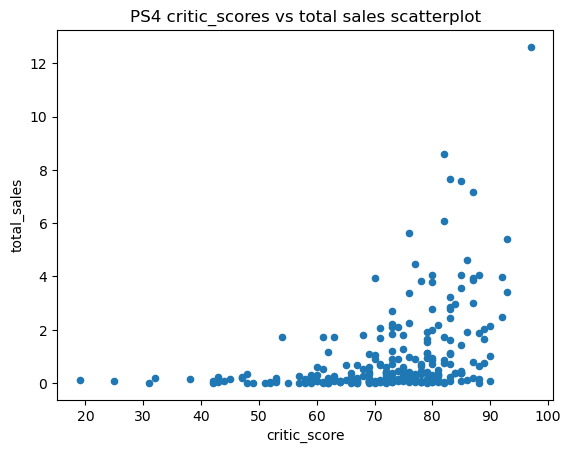

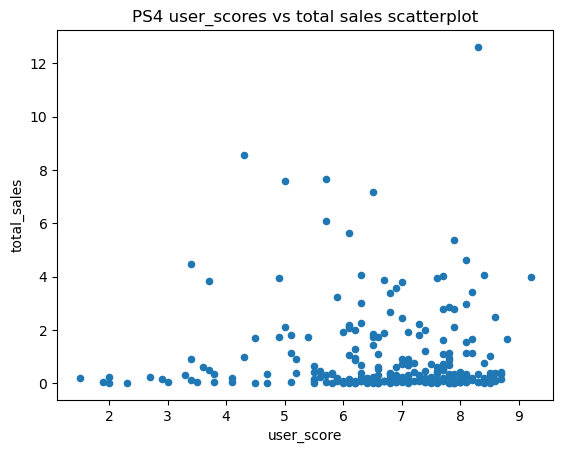

In [27]:
ps4_data = pprof_platforms.query('platform == "ps4"')
#membuat irisan row dari pprof_platforms dengan platform ps4
cols=['critic_score', 'user_score']#membuat array dengan entri: 'critic_score' dan 'user_score'
for column in cols:#loop melalui entri pada array
    ps4_data.plot(x=column, y='total_sales', kind='scatter')
    plt.title('PS4 {}s vs total sales scatterplot'.format(column))
    #membuat scatterplot untuk skor terhadap total_sales
    plt.show()#menampilkan grafik scatterplot

Sekarang mari kita mencari koefisien korelasinya. Koefisien ini berkisar antara 0 dan 1 (untuk korelasi positif) dan antara -1 dan 0 (korelasi negatif). Jika korelasinya lebih dari 0,5 berarti korelasi positif kuat; lebih rendah dari -0,5 berarti korelasi negatif yang kuat. Antara -0,5 dan 0,5 berarti sedikit atau tidak ada korelasi atau korelasi yang tidak dapat dinyatakan secara linier

In [28]:
print(ps4_data['critic_score'].corr(ps4_data['total_sales']))
#menghitung koefisien korelasi critic_score vs total_sales
print(ps4_data['user_score'].corr(ps4_data['total_sales']))
#menghitung koefisien korelasi user_score vs total_sales

0.40656790206178123
-0.03195711020455644


Hasilnya menunjukkan bahwa user_score dan critic_score memiliki sedikit atau tidak ada korelasi linier dengan penjualan. Artinya kualitas yang tinggi tidak menjamin kesuksesan komersial untuk game ps4. Dapat kita periksa untuk beberapa platform lainnya.

**Step 3.5**
Menampilkan grafik Scatterplot X-box One.

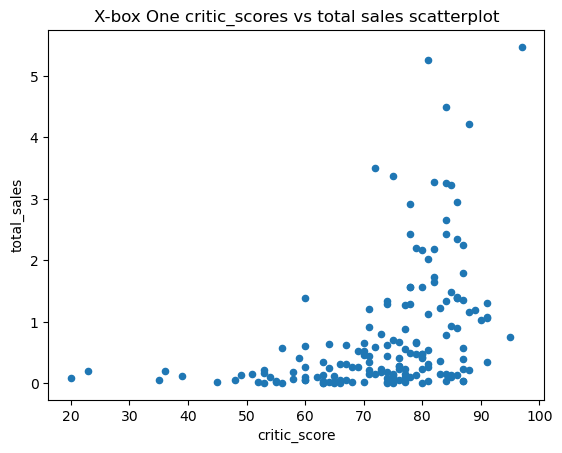

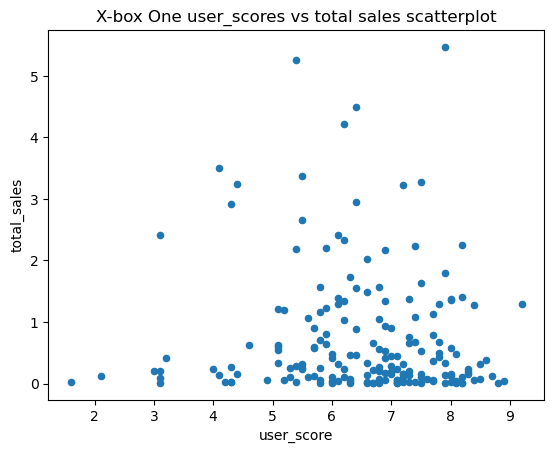

In [29]:
xone_data = pprof_platforms.query('platform == "xone"')
cols=['critic_score', 'user_score']
for column in cols:
    xone_data.plot(x=column, y='total_sales', kind='scatter')
    plt.title('X-box One {}s vs total sales scatterplot'.format(column))
    plt.show()

**Step 3.6**
Menghitung koefisien korelasi X-box One.

In [30]:
print(xone_data['critic_score'].corr(xone_data['total_sales']))
print(xone_data['user_score'].corr(xone_data['total_sales']))

0.41699832800840153
-0.06892505328279418


Dapat ditarik kesimpulan bahwa critic_score dan user_score memiliki sedikit atau tidak ada korelasi linier dengan total penjualan.

**Step 3.7**
Menampilkan grafik Scatterplot PS3.

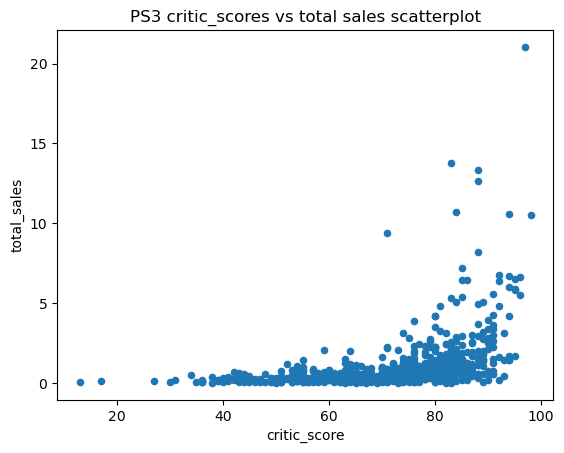

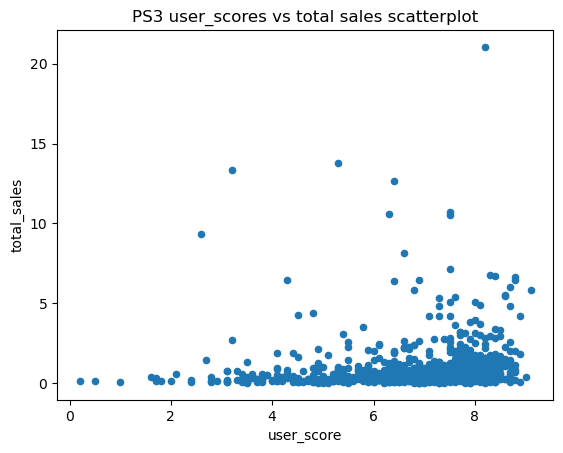

In [31]:
ps3_data=relev_data.query('platform == "ps3"')
cols=['critic_score', 'user_score']
for column in cols:
    ps3_data.plot(x=column, y='total_sales', kind='scatter')
    plt.title('PS3 {}s vs total sales scatterplot'.format(column))
    plt.show()#menampilkan grafik

**Step 3.8**
Menghitung koefisien korelasi PS3.

In [32]:
print(ps3_data['critic_score'].corr(ps3_data['total_sales']))
print(ps3_data['user_score'].corr(ps3_data['total_sales']))

0.43309630961507484
0.1243161362765603


Hasil menunjukkan tetap tidak terdapat korelasi dengan total_sales.

### Genre yang paling menguntungkan <a id='als_genre_yang_paling_menguntungkan'></a>

Data masing-masing genre yang dirilis sejak tahun 2007

In [33]:
genre_count=relev_data['genre'].value_counts().sort_values(ascending=False)
#menghitung kemunculan dari tiap unique value pada kolom 'genre' dan mengurutkannya dalam urutan descending
genre_count

genre
action          2236
misc            1168
sports          1145
adventure        958
role-playing     896
shooter          683
simulation       564
racing           499
fighting         361
strategy         360
puzzle           328
platform         290
Name: count, dtype: int64

**Step 3.9**
Menampilkan bar chart data masing-masing genre

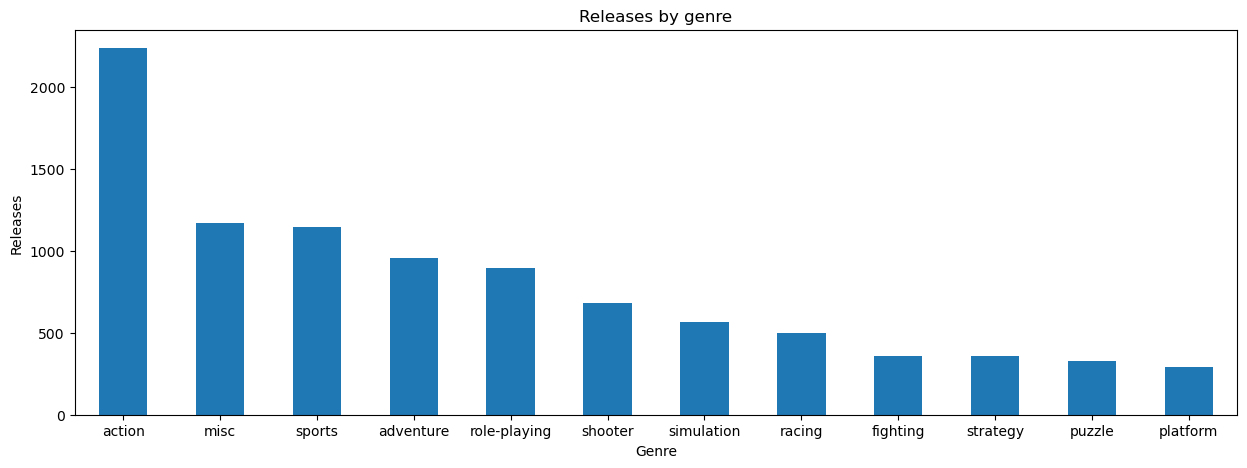

In [34]:
genre_count.plot.bar(rot=0, figsize=(15, 5))
plt.title('Releases by genre')
plt.xlabel('Genre')#memberikan label sumbu-x sebagai 'Genre'
plt.ylabel('Releases')#memberikan label sumbu-y sebagai 'Releases'
plt.show()#menampilkan grafik

Genre action memiliki release terbanyak sejauh ini (lebih dari 2000), dan yang paling sedikit adalah genre platform (kurang dari 500).

Sekarang mari kita peringkat berdasarkan total penjualan.

In [35]:
genre_profit=relev_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
#mengelompokkan relev_data berdasarkan genre and menjumlahkan total sales untuk tiap genre diurutkan berdasarkan urutan descending.
genre_profit

genre
action          1069.56
shooter          684.68
sports           664.33
misc             496.45
role-playing     466.12
racing           267.26
platform         231.01
simulation       200.75
fighting         166.26
adventure        130.35
puzzle            79.89
strategy          70.54
Name: total_sales, dtype: float64

Tampilan Grafik bar chart.

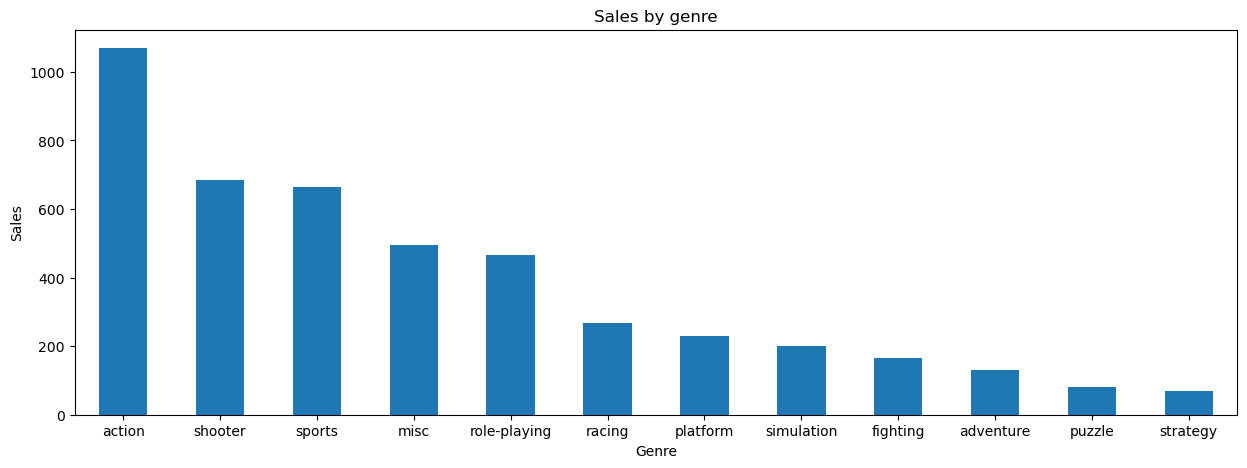

In [36]:
genre_profit.plot.bar(rot=0, figsize=(15, 5))
plt.title('Sales by genre')
plt.xlabel('Genre')#memberikan label sumbu-x sebagai 'Genre'
plt.ylabel('Sales')#memberikan label sumbu-y sebagai 'Sales'
plt.show()#menampilkan grafik

Genre yang paling profitable adalah genre action (lebih dari 1 miliar dolar), shooter, dan sports. Yang kurang profitable melibatkan adventure, puzzle, dan strategy. Genre yang paling banyak terjual (action hingga role-playing) sebagian besar membutuhkan grafik yang sangat tinggi, sedangkan genre yang paling sedikit terjual (balap dan sisanya) sebagian besar tidak memerlukan banyak pekerjaan grafis dari para desainer grafis.

## Profil pengguna untuk setiap wilayah <a id='als_user'></a>

### Profil Pengguna North America <a id='als_user_na'></a>

**Step 3.10**
Menemukan platform (5 teratas), genre (5 teratas), dan peringkat game yang paling laris di North America dan menampilkan dalam bentuk pie chart.

platform
x360    560.41
wii     426.04
ps3     384.65
ds      276.07
ps4     108.74
Name: na_sales, dtype: float64


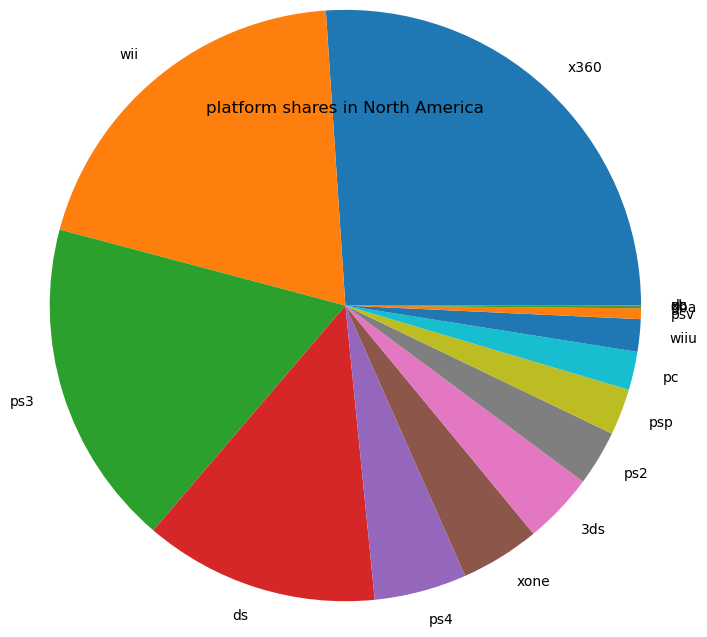


genre
action          501.81
shooter         353.06
sports          327.98
misc            264.51
role-playing    175.79
Name: na_sales, dtype: float64


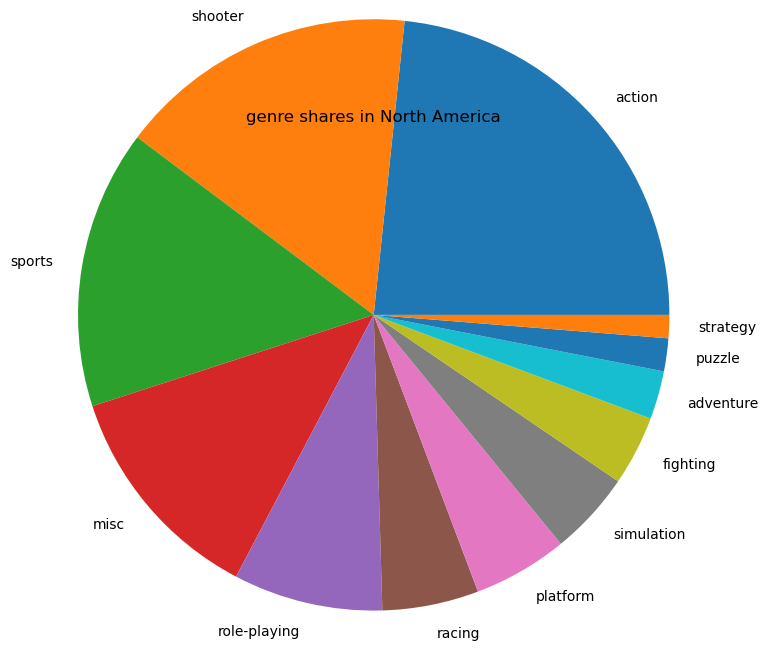


rating
E       780.19
M       578.09
T       495.89
E10+    295.30
EC        1.32
Name: na_sales, dtype: float64


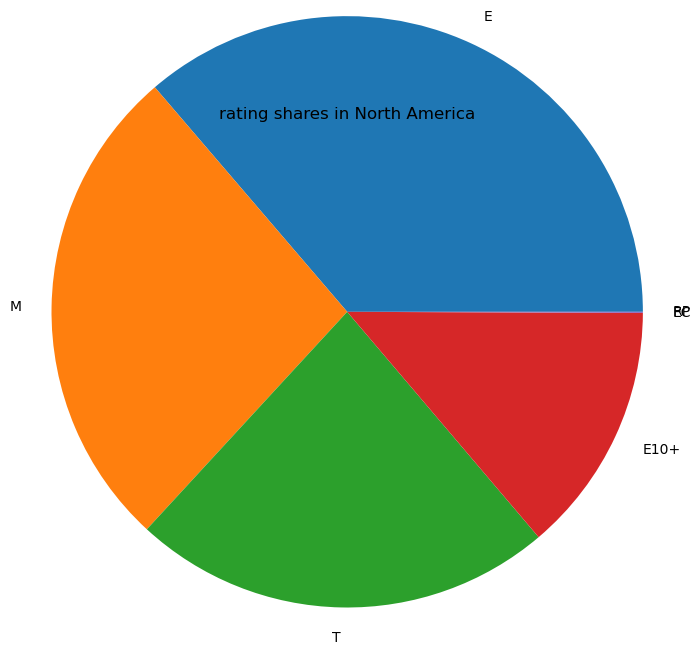

In [37]:
cols=['platform', 'genre', 'rating']
#membuat array yang dinamakan cols dengan entri 'platform', 'genre', dan 'rating'
for col in cols:#loop melalui array cols
    na_slice=relev_data.groupby(col)['na_sales'].sum().sort_values(ascending=False)
    #mengelompokkan relev_data berdasarkan kolom-kolom yang ada dan menghitung jumlah penjualannya yang diurutkan berdasarkan urutan descending 
    print(na_slice.head())#menampilkan 5 baris awal dari pengelompokan tersebut
    plt.pie(na_slice, labels=na_slice.index, radius=2)#membuat pie chart dari pengelompokan tersebut
    plt.title('{} shares in North America'.format(col))
    #memberikan titel pada pie chart dengan format '<col> shares in North America'
    plt.show()#menampilkan grafik yang dibuat di atas
    print('')#mencetak garis kosong

Untuk pasar Amerika Utara, 5 platform teratas adalah x360 (buatan AS), wii, ps3, ds, dan ps4. 4 di antaranya adalah home consoles, dan dsnya portabel. 5 genre teratas adalah Action, Shooter, Sports, Miscellaneous, dan Role-playing. Game dengan rating 'E' (Everyone/Semua Orang) terjual paling tinggi, diikuti oleh 'M' (Mature/Dewasa), kemudian diikuti oleh 'T' (Teen/Remaja).

### Profil Pengguna EU <a id='als_user_eu'></a>

**Step 3.11**
Menemukan platform (5 teratas), genre (5 teratas), dan peringkat game yang paling laris di EU dan menampilkan dalam bentuk pie chart.

platform
ps3     322.91
x360    259.49
wii     218.59
ps4     141.09
ds      120.40
Name: eu_sales, dtype: float64


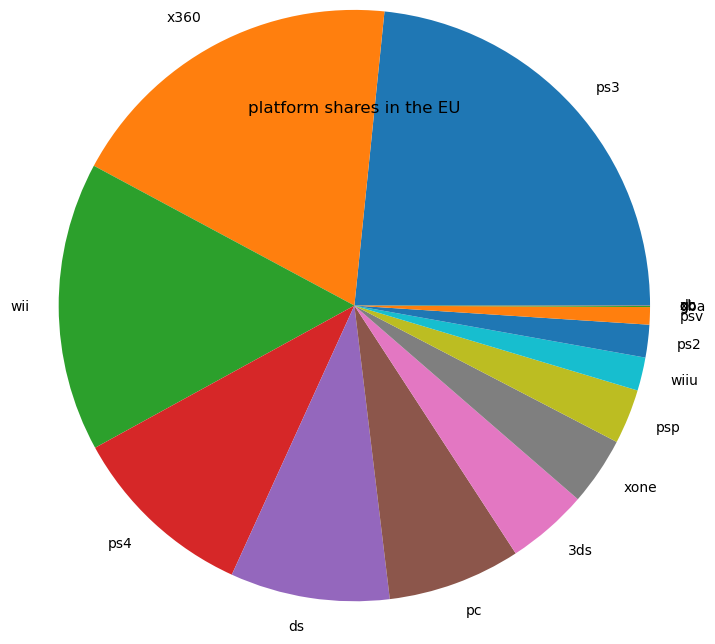


genre
action     341.95
shooter    232.36
sports     212.63
misc       129.02
racing     105.72
Name: eu_sales, dtype: float64


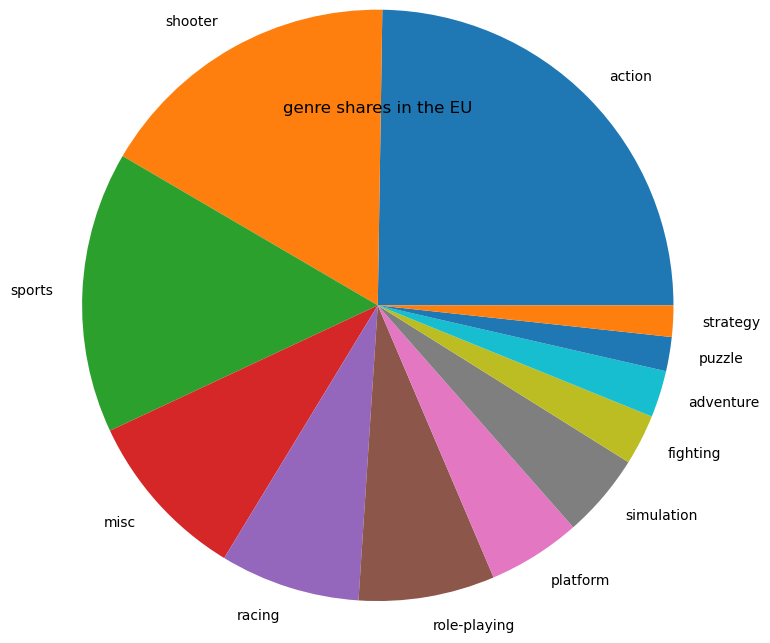


rating
E       506.68
M       410.73
T       296.03
E10+    167.87
RP        0.08
Name: eu_sales, dtype: float64


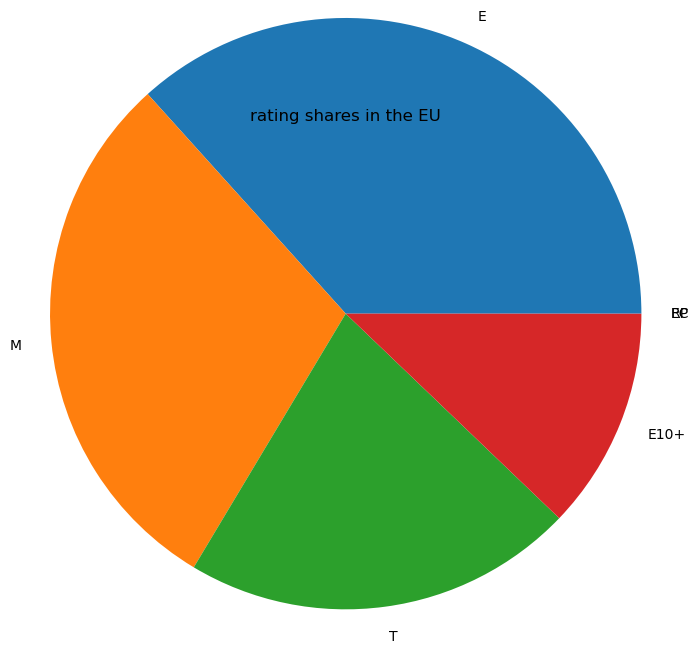

In [38]:
cols=['platform', 'genre', 'rating']
#membuat array yang dinamakan cols dengan entri 'platform', 'genre', dan 'rating'
for col in cols:#loop melalui array cols
    eu_slice=relev_data.groupby(col)['eu_sales'].sum().sort_values(ascending=False)
    #mengelompokkan relev_data berdasarkan kolom-kolom yang ada dan menghitung jumlah penjualannya yang diurutkan berdasarkan urutan descending 
    print(eu_slice.head())#menampilkan 5 baris awal dari pengelompokan tersebut
    plt.pie(eu_slice, labels=eu_slice.index, radius=2)#membuat pie chart dari pengelompokan tersebut
    plt.title('{} shares in the EU'.format(col))
    #memberikan titel pada pie chart dengan format '<col> shares in EU'
    plt.show()#menampilkan grafik yang dibuat di atas
    print('')#mencetak garis kosong

Untuk pasar UE, 5 platform teratas adalah PS3, X360, wii, PS4, dan DS. Kita masih dapat melihat dominasi home consoles. 5 genre teratas adalah Action, Shooter, Sports, Miscellaneous, dan Racing. Game dengan rating E masih terjual tertinggi, disusul M, dan T.

### Profil Pengguna Jepang <a id='als_user_jp'></a>

**Step 3.12**
Menemukan platform (5 teratas), genre (5 teratas), dan peringkat game yang paling laris di Jepang dan menampilkan dalam bentuk pie chart.

platform
ds     103.48
3ds    100.67
ps3     79.11
psp     67.14
wii     60.18
Name: jp_sales, dtype: float64


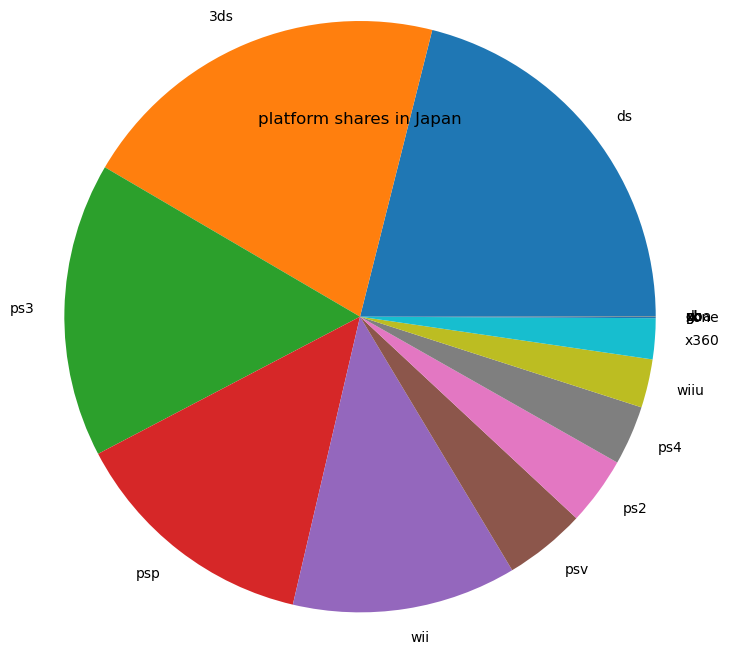


genre
role-playing    151.01
action           97.22
misc             49.88
sports           40.67
adventure        26.93
Name: jp_sales, dtype: float64


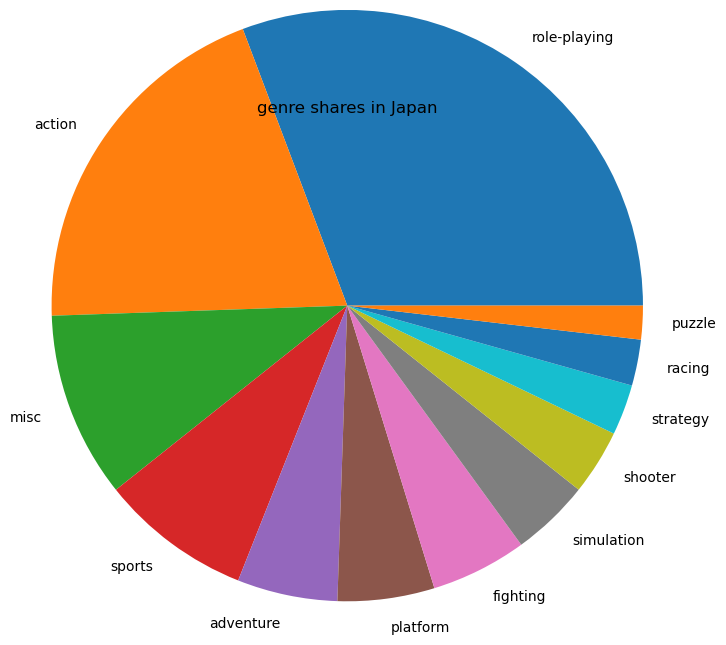


rating
T       230.30
E       185.06
M        43.83
E10+     31.91
EC        0.00
Name: jp_sales, dtype: float64


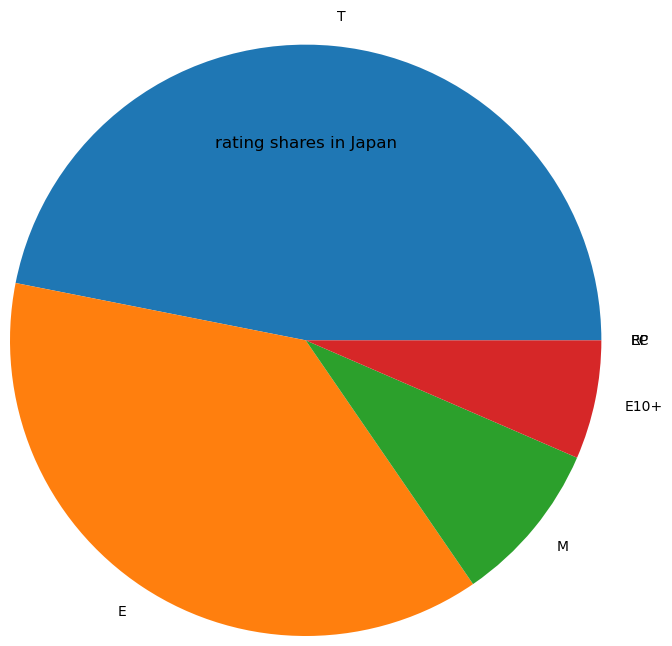

In [39]:
cols=['platform', 'genre', 'rating']
#membuat array yang dinamakan cols dengan entri 'platform', 'genre', dan 'rating'
for col in cols:#loop melalui array cols
    jp_slice=relev_data.groupby(col)['jp_sales'].sum().sort_values(ascending=False)
    #mengelompokkan relev_data berdasarkan kolom-kolom yang ada dan menghitung jumlah penjualannya yang diurutkan berdasarkan urutan descending 
    print(jp_slice.head())#menampilkan 5 baris awal dari pengelompokan tersebut
    plt.pie(jp_slice, labels=jp_slice.index, radius=2)#membuat pie chart dari pengelompokan tersebut
    plt.title('{} shares in Japan'.format(col))
    #memberikan titel pada pie chart dengan format '<col> shares in Japan'
    plt.show()#menampilkan grafik yang dibuat di atas
    print('')#mencetak garis kosong

Untuk pasar Jepang, 5 platform teratas adalah ds, 3ds, ps3, psp, dan wii. Dapat dilihat juga bahwa preferensi lebih condong untuk platform handhelds (ds, 3ds, dan psp; semuanya dibuat di Jepang). Genre teratas adalah Role-Playing, diikuti oleh Action, Miscellaneous, Sports, dan Adventure. Peringkat terlaris adalah T, diikuti oleh E, dan M.

### Kesimpulan <a id='data_review_conclusions'></a> 

Dari preferensi pengguna di seluruh wilayah Amerika Utara, UE, dan Jepang, dapat ditarik kesimpulan sebagai berikut. Wilayah Amerika Utara dan UE menunjukkan preferensi terhadap home consoles (seperti: x360, ps3, wii, dan ps4) sedangkan pasar Jepang menunjukkan preferensi umum terhadap handhelds (seperti: ds, 3ds, dan psp).
Pasar Amerika Utara dan UE menunjukkan preferensi terhadap permainan Action, Shooter, dan Sports, sedangkan pasar Jepang cenderung menyukai Role-Playing, juga Action dan Sports setelahnya. 
Terkait rating, 3 teratas sama di semua wilayah; Amerika Utara dan UE lebih menyukai permainan dengan rating E, diikuti oleh M, dan kemudian T, sedangkan di Jepang, preferensinya adalah T, diikuti oleh E, dan kemudian M.

## Pengujian Hipotesis <a name='hypothesis_test'></a>

### Uji Hipotesis 1: 'Rata-rata rating pengguna platform Xbox One dan PC adalah sama' <a id='test_1'></a>

Hipotesis Null berbunyi: 'Rata-rata rating pengguna platform Xbox One dan PC adalah sama'. Hipotesis Alternatif berbunyi: 'Rata-rata rating pengguna platform Xbox One dan PC tidak sama'.

**Step 4.1**
Membuat irisan yang diperlukan, satu irisan untuk platform xone dan satu lagi untuk platform pc.

In [40]:
xone_slice = relev_data.query('platform == "xone"')
#membuat irisan row dari relev_data di mana platform adalah xone (X-Box One)
xone_slice.info()#informasi umum terkait irisan di atas


<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 99 to 16672
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             247 non-null    object 
 1   platform         247 non-null    object 
 2   year_of_release  247 non-null    int32  
 3   genre            247 non-null    object 
 4   na_sales         247 non-null    float64
 5   eu_sales         247 non-null    float64
 6   jp_sales         247 non-null    float64
 7   other_sales      247 non-null    float64
 8   critic_score     169 non-null    float64
 9   user_score       182 non-null    float64
 10  rating           247 non-null    object 
 11  total_sales      247 non-null    float64
dtypes: float64(7), int32(1), object(4)
memory usage: 24.1+ KB


In [41]:
pc_slice = relev_data.query('platform == "pc"')
#membuat irisan row dari relev_data di mana platform adalah pc (PC)
pc_slice.info()#informasi umum terkait irisan di atas

<class 'pandas.core.frame.DataFrame'>
Index: 741 entries, 85 to 16705
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             741 non-null    object 
 1   platform         741 non-null    object 
 2   year_of_release  741 non-null    int32  
 3   genre            741 non-null    object 
 4   na_sales         741 non-null    float64
 5   eu_sales         741 non-null    float64
 6   jp_sales         741 non-null    float64
 7   other_sales      741 non-null    float64
 8   critic_score     551 non-null    float64
 9   user_score       586 non-null    float64
 10  rating           741 non-null    object 
 11  total_sales      741 non-null    float64
dtypes: float64(7), int32(1), object(4)
memory usage: 72.4+ KB


Sebelum melangkah lebih lanjut, untuk menghindari nilai p NaN, isian pada kolom user_score perlu dilengkapi terlebih dahulu dengan menggunakan value mean.

In [42]:
xone_slice['user_score'] = xone_slice['user_score'].fillna(xone_slice['user_score'].mean())
pc_slice['user_score'] = pc_slice['user_score'].fillna(pc_slice['user_score'].mean())
#mengganti missing values pada kolom 'user_score' dengan value mean dari kolom 'user_score'
xone_slice.info()
pc_slice.info()
#informasi umum terkait dataframe games

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 99 to 16672
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             247 non-null    object 
 1   platform         247 non-null    object 
 2   year_of_release  247 non-null    int32  
 3   genre            247 non-null    object 
 4   na_sales         247 non-null    float64
 5   eu_sales         247 non-null    float64
 6   jp_sales         247 non-null    float64
 7   other_sales      247 non-null    float64
 8   critic_score     169 non-null    float64
 9   user_score       247 non-null    float64
 10  rating           247 non-null    object 
 11  total_sales      247 non-null    float64
dtypes: float64(7), int32(1), object(4)
memory usage: 24.1+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 741 entries, 85 to 16705
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  ---

C:\Users\Luqmanulhakim\AppData\Local\Temp\ipykernel_7360\3799505278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xone_slice['user_score'] = xone_slice['user_score'].fillna(xone_slice['user_score'].mean())
C:\Users\Luqmanulhakim\AppData\Local\Temp\ipykernel_7360\3799505278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pc_slice['user_score'] = pc_slice['user_score'].fillna(pc_slice['user_score'].mean())


Sebelum menguji hipotesis, kita perlu menguji apakah variansnya dapat dianggap homogen. Untuk melakukannya, kita akan mengimplementasikan pengujian Levene menggunakan metode st.levene() yang akan mengambil kolom skor_pengguna dari kedua irisan sebagai argumen, dan juga setting parameter "center='mean'". 
Metode ini mengembalikan nilai p yang akan kita bandingkan dengan ambang batas yang disebut signifikansi statistik (biasa disebut alpha). Kita akan mengatur alpha menjadi 5%. Jika nilai p yang dikembalikan lebih besar dari alpha kita, maka variansnya dapat dianggap homogen. Jika lebih rendah dari alpha kita, maka variansnya tidak bisa dianggap homogen

**Step 4.2**
Menguji apakah variansnya dapat dianggap homogen

In [43]:
alpha = 0.05 #setting alpha 5%
result = st.levene(xone_slice['user_score'], pc_slice['user_score'], center='mean')
#mengimplementasikan Levene's test pada irisan yang menspesifikasikan bahwa varians dihitung dari nilai mean
print('p-value:', result.pvalue)#print p-value
if result.pvalue > alpha:#kondisi jika p-value lebih besar dari alpha
    print('The variances are approximately the same')#Varians kurang lebih sama
else:#kondisi jika p-value lebih kecil dari alpha
    print('The variances are too far apart to be considered homogeneous')
    #Varians tidak dapat disebut homogeneous

p-value: 0.010463317797293684
The variances are too far apart to be considered homogeneous


Nilai p lebih besar dari alfa sehingga dapat disimpulkan bahwa variansnya tidak homogen untuk uji hipotesis. Untuk menguji hipotesis kita, kita akan menggunakan metode st.ttest_ind() yang menguji kemungkinan rata-rata (rata-rata) dari 2 populasi statistik (dalam hal ini, kedua kolom irisan kita) adalah sama. Dibutuhkan kedua kolom irisan sebagai argumen, dan kita akan menetapkan parameter 'equal_var=False' karena kita menyimpulkan dari uji Levene bahwa varians dianggap  tidak homogen. Hal ini juga mengembalikan nilai p yang akan kita bandingkan dengan alpha kita. Jika nilai p lebih besar dari alfa kita, berarti rata-ratanya kemungkinan besar sama, sehingga kita tidak dapat menolak hipotesis nol kita. Jika tidak, kita dapat menolak hipotesis nol.

**Step 4.3**
Menguji hipotesis nol dan alternatif.

In [44]:
alpha = 0.05 #setting alpha 5%
result = st.ttest_ind(xone_slice['user_score'], pc_slice['user_score'], equal_var=False)
#mengimplementasikan t-test pada irisan yang menspesifikasikan bahwa varians kira-kira sama.
print('p-value:', result.pvalue)#print p-value
if result.pvalue > alpha:#kondisi jika p-value lebih besar dari alpha
    print('We cannot reject the null hypothesis')
    #artinya kemungkinan besar sama, jadi kita tidak bisa menolak hipotesis nol
else:#kondisi jika p-value lebih kecil dari alpha
    print('We reject the null hypothesis')
    #artinya kemungkinan besar tidak sama, jadi kita menolak hipotesis nol

p-value: 0.006463309203383018
We reject the null hypothesis


Nilai p lebih besar dari alfa, yang berarti rata-rata (means) dari 2 populasi statistik kita cenderung sama. Oleh karena itu, kita menolak hipotesis nol, yang berarti berlaku hipotesis alternatif.
Rata-rata rating pengguna platform Xbox One dan PC tidak sama.

### Uji Hipotesis 2: 'Rata-rata rating pengguna untuk genre Action dan Sports tidak sama' <a id='test_2'></a>

Hipotesis Nol berbunyi: 'Rata-rata rating pengguna untuk genre Action dan Sports adalah sama'. Hipotesis Alternatif berbunyi: 'Rata-rata rating pengguna untuk genre Action dan Sports tidak sama'.

**Step 4.4**
Membuat irisan yang diperlukan, satu irisan untuk genre action dan satu lagi untuk genre sports.

In [45]:
action_slice = relev_data.query('genre == "action"')
action_slice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 16 to 16710
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2236 non-null   object 
 1   platform         2236 non-null   object 
 2   year_of_release  2236 non-null   int32  
 3   genre            2236 non-null   object 
 4   na_sales         2236 non-null   float64
 5   eu_sales         2236 non-null   float64
 6   jp_sales         2236 non-null   float64
 7   other_sales      2236 non-null   float64
 8   critic_score     1210 non-null   float64
 9   user_score       1239 non-null   float64
 10  rating           2236 non-null   object 
 11  total_sales      2236 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 218.4+ KB


In [46]:
sports_slice = relev_data.query('genre == "sports"')
sports_slice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1145 entries, 3 to 16700
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1145 non-null   object 
 1   platform         1145 non-null   object 
 2   year_of_release  1145 non-null   int32  
 3   genre            1145 non-null   object 
 4   na_sales         1145 non-null   float64
 5   eu_sales         1145 non-null   float64
 6   jp_sales         1145 non-null   float64
 7   other_sales      1145 non-null   float64
 8   critic_score     563 non-null    float64
 9   user_score       598 non-null    float64
 10  rating           1145 non-null   object 
 11  total_sales      1145 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 111.8+ KB


Sebelum melangkah lebih lanjut, untuk menghindari nilai p NaN, isian pada kolom user_score perlu dilengkapi terlebih dahulu dengan menggunakan value mean.

In [47]:
action_slice['user_score'] = action_slice['user_score'].fillna(action_slice['user_score'].mean())
sports_slice['user_score'] = sports_slice['user_score'].fillna(sports_slice['user_score'].mean())
#mengganti missing values pada kolom 'user_score' dengan value mean dari kolom 'user_score'
action_slice.info()
sports_slice.info()
#informasi umum terkait dataframe games

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 16 to 16710
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2236 non-null   object 
 1   platform         2236 non-null   object 
 2   year_of_release  2236 non-null   int32  
 3   genre            2236 non-null   object 
 4   na_sales         2236 non-null   float64
 5   eu_sales         2236 non-null   float64
 6   jp_sales         2236 non-null   float64
 7   other_sales      2236 non-null   float64
 8   critic_score     1210 non-null   float64
 9   user_score       2236 non-null   float64
 10  rating           2236 non-null   object 
 11  total_sales      2236 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 218.4+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 1145 entries, 3 to 16700
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -

C:\Users\Luqmanulhakim\AppData\Local\Temp\ipykernel_7360\852365098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_slice['user_score'] = action_slice['user_score'].fillna(action_slice['user_score'].mean())
C:\Users\Luqmanulhakim\AppData\Local\Temp\ipykernel_7360\852365098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sports_slice['user_score'] = sports_slice['user_score'].fillna(sports_slice['user_score'].mean())


Sebelum menguji hipotesis, kita perlu menguji apakah variansnya dapat dianggap homogen. Untuk melakukannya, kita akan mengimplementasikan pengujian Levene menggunakan metode st.levene() yang akan mengambil kolom skor_pengguna dari kedua irisan sebagai argumen, dan juga setting parameter "center='mean'". 
Metode ini mengembalikan nilai p yang akan kita bandingkan dengan ambang batas yang disebut signifikansi statistik (biasa disebut alpha). Kita akan mengatur alpha menjadi 5%. Jika nilai p yang dikembalikan lebih besar dari alpha kita, maka variansnya dapat dianggap homogen. Jika lebih rendah dari alpha kita, maka variansnya tidak bisa dianggap homogen

**Step 4.5**
Menguji apakah variansnya dapat dianggap homogen

In [48]:
alpha = 0.05 #setting alpha 5%
result = st.levene(action_slice['user_score'], sports_slice['user_score'], center='mean')
#mengimplementasikan Levene's test pada irisan yang menspesifikasikan bahwa varians dihitung dari nilai mean
print('p-value:', result.pvalue)#print p-value
if result.pvalue > alpha:#kondisi jika p-value lebih besar dari alpha
    print('The variances are approximately the same')#Varians kurang lebih sama
else:#kondisi jika p-value lebih kecil dari alpha
    print('The variances are too far apart to be considered homogeneous')
    #Varians tidak dapat disebut homogeneous

p-value: 0.0009297306102636887
The variances are too far apart to be considered homogeneous


Nilai p yang dihasilkan lebih kecil dari alfa, dengan demikian variansnya tidak bisa dianggap homogen. Jadi ketika menerapkan metode st.ttest_ind() untuk menguji kesetaraan rata-rata, kita akan menetapkan parameter 'equal_var=False'. 
Kita akan membandingkan lagi nilai p yang dikembalikan ke alpha kita. Jika nilai p lebih besar dari alfa kita, berarti rata-ratanya kemungkinan besar sama, dan dalam hal ini kita akan menolak hipotesis nol kita. Jika tidak, kita tidak dapat menolak hipotesis nol.

**Step 4.6**
Menguji hipotesis nol dan alternatif.

In [49]:
alpha = 0.05 #setting alpha 5%
result = st.ttest_ind(action_slice['user_score'], sports_slice['user_score'], equal_var=False)
#mengimplementasikan t-test pada irisan yang menspesifikasikan bahwa varians berbeda
print('p-value:', result.pvalue)#print p-value
if result.pvalue > alpha:#kondisi jika p-value lebih besar dari alpha
    print('We cannot reject the null hypothesis')
    #artinya kemungkinan besar sama, jadi kita tidak bisa menolak hipotesis nol
else:#kondisi jika p-value lebih kecil dari alpha
    print('We reject the null hypothesis')
    #artinya kemungkinan besar tidak sama, jadi kita menolak hipotesis nol

p-value: 3.292534637486583e-35
We reject the null hypothesis


Nilai p yang dihasilkan lebih besar dari alfa. Oleh karena itu, kita tidak dapat menolak hipotesis nol, yang berarti berlaku hipotesis nol. Rata-rata rating pengguna untuk genre Action dan Sports adalah sama.

## Temuan <a name='end'></a>

Pada data games terdapat nilai yang hilang dan telah diisi. Genre, rating, dan platform yang paling menguntungkan telah dapat ditentukan. Ditemukan juga bahwa critic_score dan user_score tidak memiliki korelasi linier dengan total penjualan. Profil pengguna untuk pasar Amerika Utara, UE, dan Jepang juga telah dibuat.
Dan yang terakhir, pengujian hipotesis juga telah dilakukan dengan kesimpulan bahwa rata-rata rating pengguna platform Xbox One dan PC tidak sama, dan rata-rata rating pengguna untuk genre Action dan Sports adalah sama.